#ARIMA model

##Data preprocessing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import yfinance as yf
from google.colab import drive
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import drive
from scipy.stats import normaltest
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Close prices

[*********************100%***********************]  1 of 1 completed


ADF Statistic: 2.74531003055339
P-value: 1.0
Normal test Statistic: 1050.390
P-value: 0.000


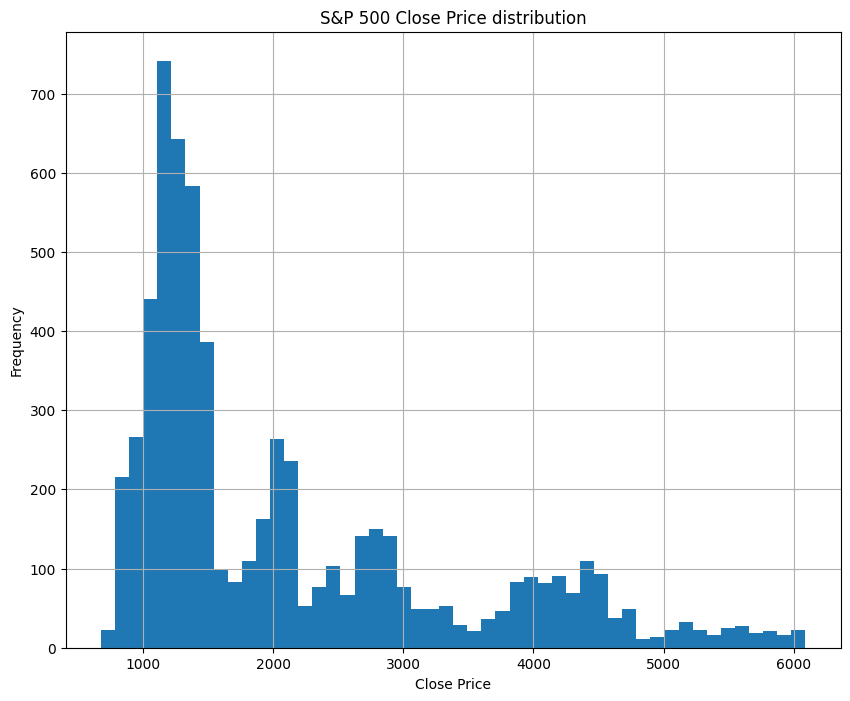

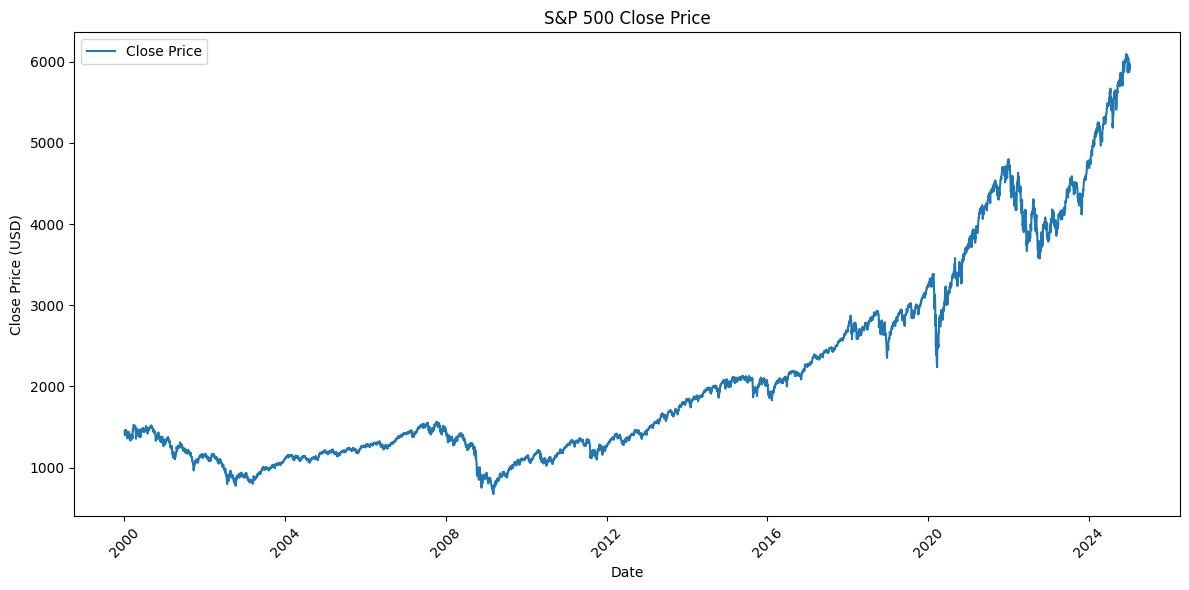

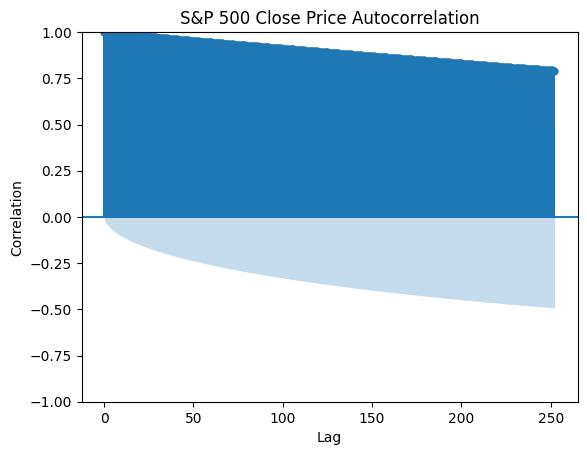

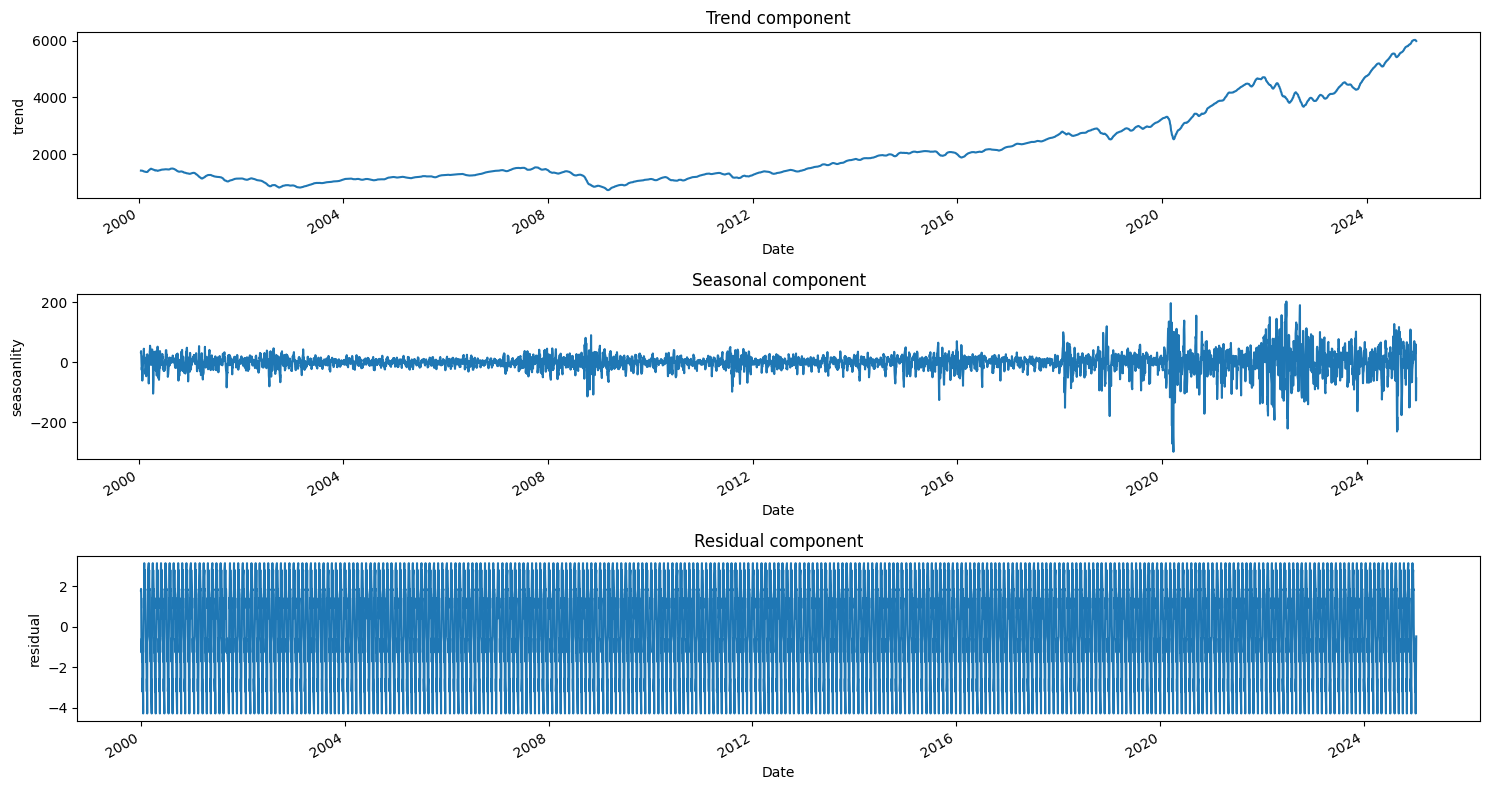

In [2]:
#import financial time series
ticker = "^GSPC"
start_date = "2000-01-01"
end_date = "2025-01-08"
# end_date = datetime.date.today().strftime("%Y-%m-%d")
sp500_data = yf.download(ticker, start = start_date, end = end_date, interval="1d")
sp500_data.index = sp500_data.index.tz_localize(None)


#test stationarity with the Augmented Dickey-Fuller (ADF) test
result = adfuller(sp500_data['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}") # If the p-value is less than 0.05, the series is likely stationary


#test normality with Normality test
stat, p = normaltest(sp500_data['Close'])
print(f"Normal test Statistic: {stat[0]:.3f}")
print(f"P-value: {p[0]:.3f}") # If the p-value is more than 0.05, the series is normally distributed


#visualise
sp500_data['Close'].hist(bins=50, figsize=(10, 8))
plt.title('S&P 500 Close Price distribution')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(data=sp500_data['Close'])
plt.title('S&P 500 Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend( labels=["Close Price"])
plt.show()


#plot autocorrelation
plot_acf(sp500_data['Close'], lags=252)
plt.title('S&P 500 Close Price Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()


#decompose time series
res = seasonal_decompose(sp500_data['Close'], model = "additive",period = 21)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
ax1.set_title("Trend component")
res.resid.plot(ax=ax2,ylabel = "seasoanlity")
ax2.set_title("Seasonal component")
res.seasonal.plot(ax=ax3,ylabel = "residual")
ax3.set_title("Residual component")

plt.tight_layout() #adjust layout to avoid plot overlapping
plt.show()

Log returns

Mounted at /content/gdrive
ADF Statistic: -19.079670761190673
P-value: 0.0
Normal test Statistic: 1050.390
P-value: 0.000


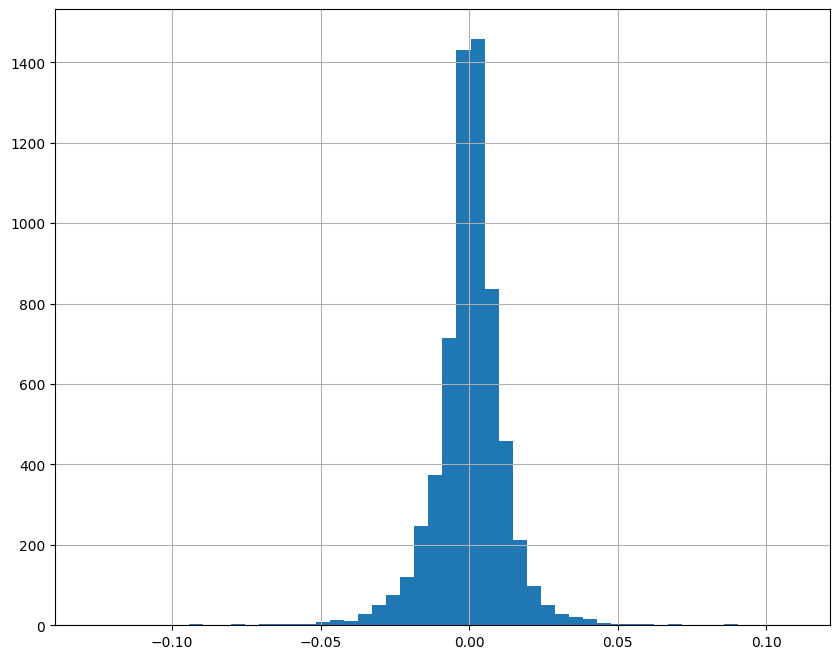

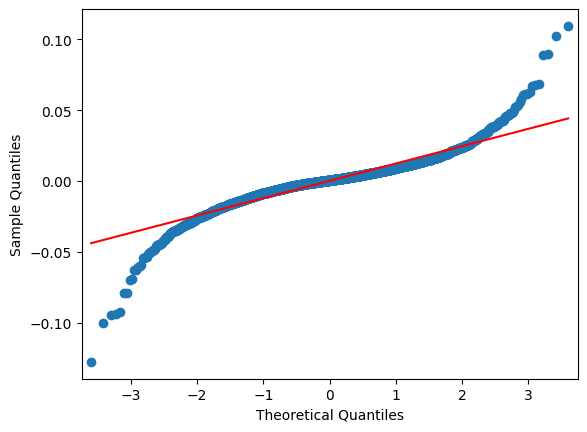

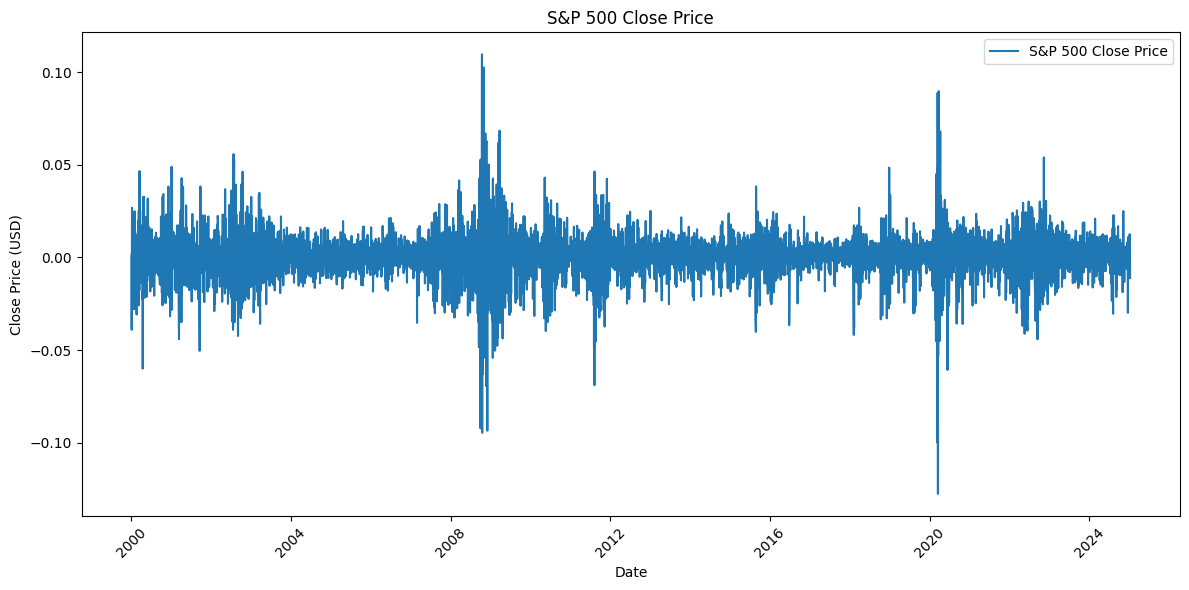

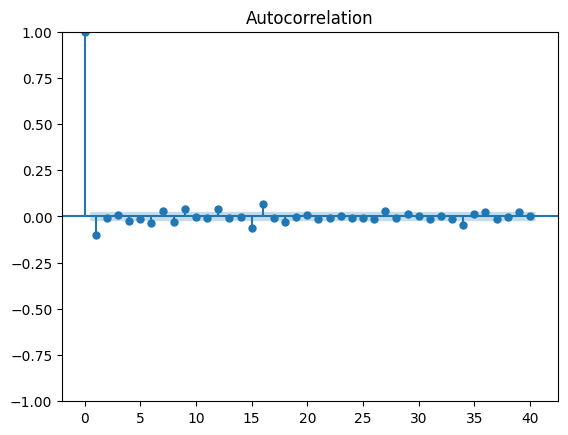

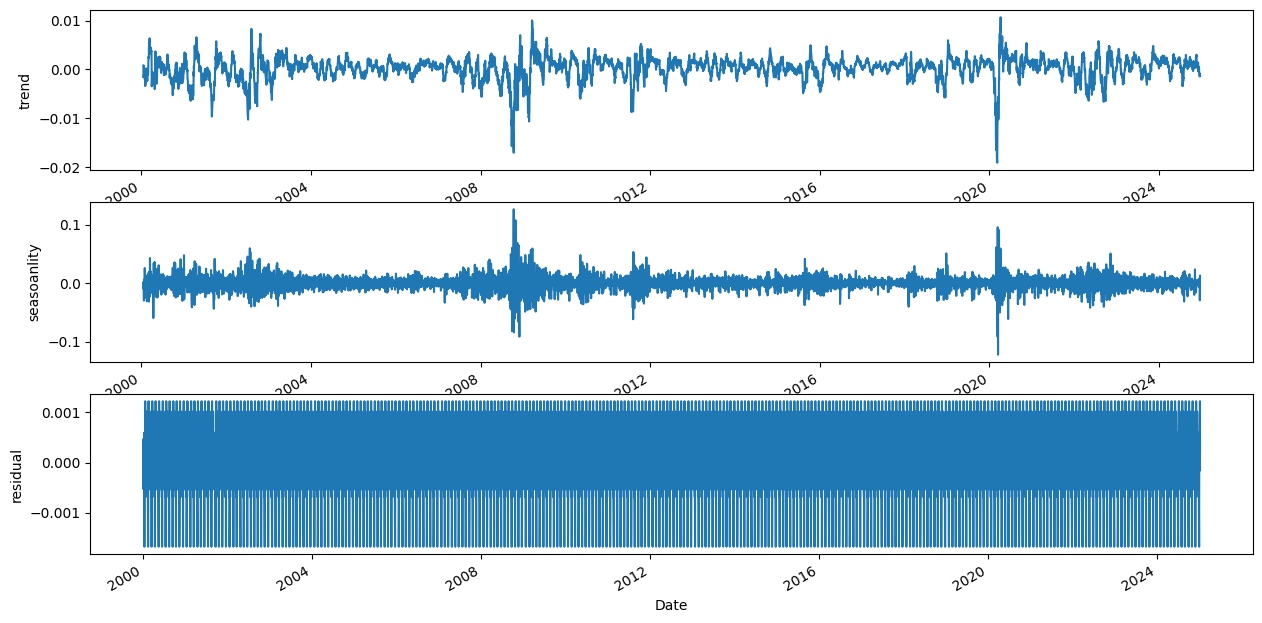

In [3]:
#compute log returns
sp500_data['Log Return'] = np.log(sp500_data['Close'] / sp500_data['Close'].shift(1))
#sp500_data.dropna(inplace = True)
sp500_data.fillna(0, inplace=True)


#save time series
drive.mount("/content/gdrive")
file_path = '/content/gdrive/MyDrive/università/Machine_learning/Project_code/ARIMA/sp500_data.csv'
sp500_data.to_csv(file_path, index=True)


#test stationarity with the Augmented Dickey-Fuller (ADF) test
result = adfuller(sp500_data['Log Return'])
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}") # If the p-value is less than 0.05, the series is likely stationary


#test normality with Normality test
stat, p = normaltest(sp500_data['Close'])
print(f"Normal test Statistic: {stat[0]:.3f}")
print(f"P-value: {p[0]:.3f}") # If the p-value is more than 0.05, the series is normally distributed


sp500_data['Log Return'].hist(bins=50, figsize=(10, 8))
plt.show()

sm.qqplot(sp500_data['Log Return'], line='s')
plt.show()


#visualise
plt.figure(figsize=(12, 6))
sns.lineplot(x=sp500_data.index, y=sp500_data['Log Return'], label="S&P 500 Close Price")
plt.title('S&P 500 Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.show()


# Plot the ACF
plot_acf(sp500_data['Log Return'], lags=40)  # You can adjust the number of lags
plt.show()


#decompose time series
res = seasonal_decompose(sp500_data['Log Return'], model = "additive",period = 21)
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res.trend.plot(ax=ax1,ylabel = "trend")
res.resid.plot(ax=ax2,ylabel = "seasoanlity")
res.seasonal.plot(ax=ax3,ylabel = "residual")
plt.show()

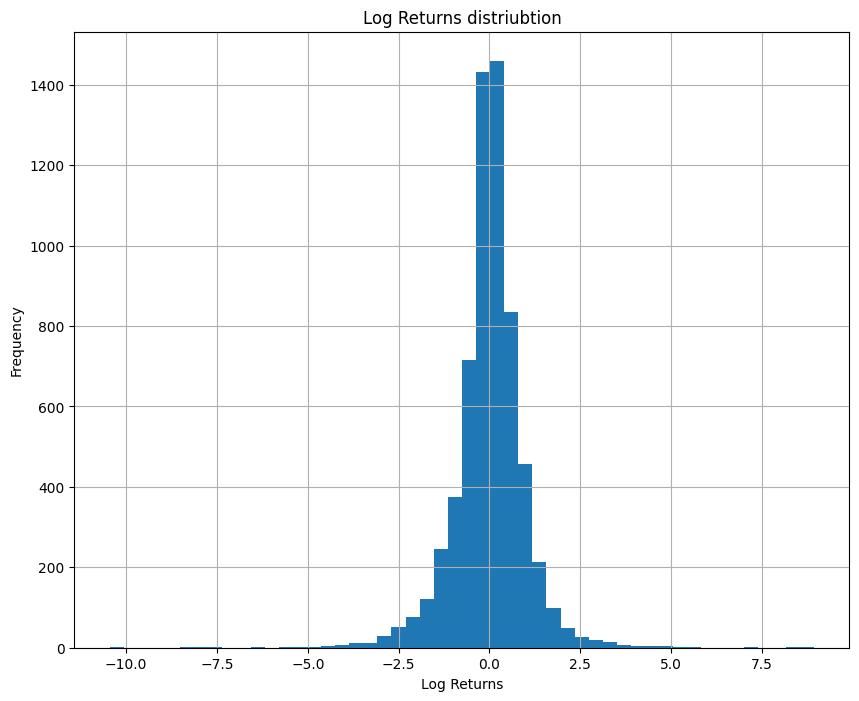

Normal test Statistic: 1274.798
P-value: 0.000


In [4]:
# Normalize by dividing by standard deviation
normalized_returns = (sp500_data['Log Return'] -sp500_data['Log Return'].mean()) / sp500_data['Log Return'].std()
normalized_returns.hist(bins=50, figsize=(10, 8))
plt.title('Log Returns distriubtion')
plt.xlabel('Log Returns')
plt.ylabel('Frequency')
plt.show()

#test normality
stat, p = normaltest(normalized_returns)
print(f"Normal test Statistic: {stat:.3f}")
print(f"P-value: {p:.3f}")

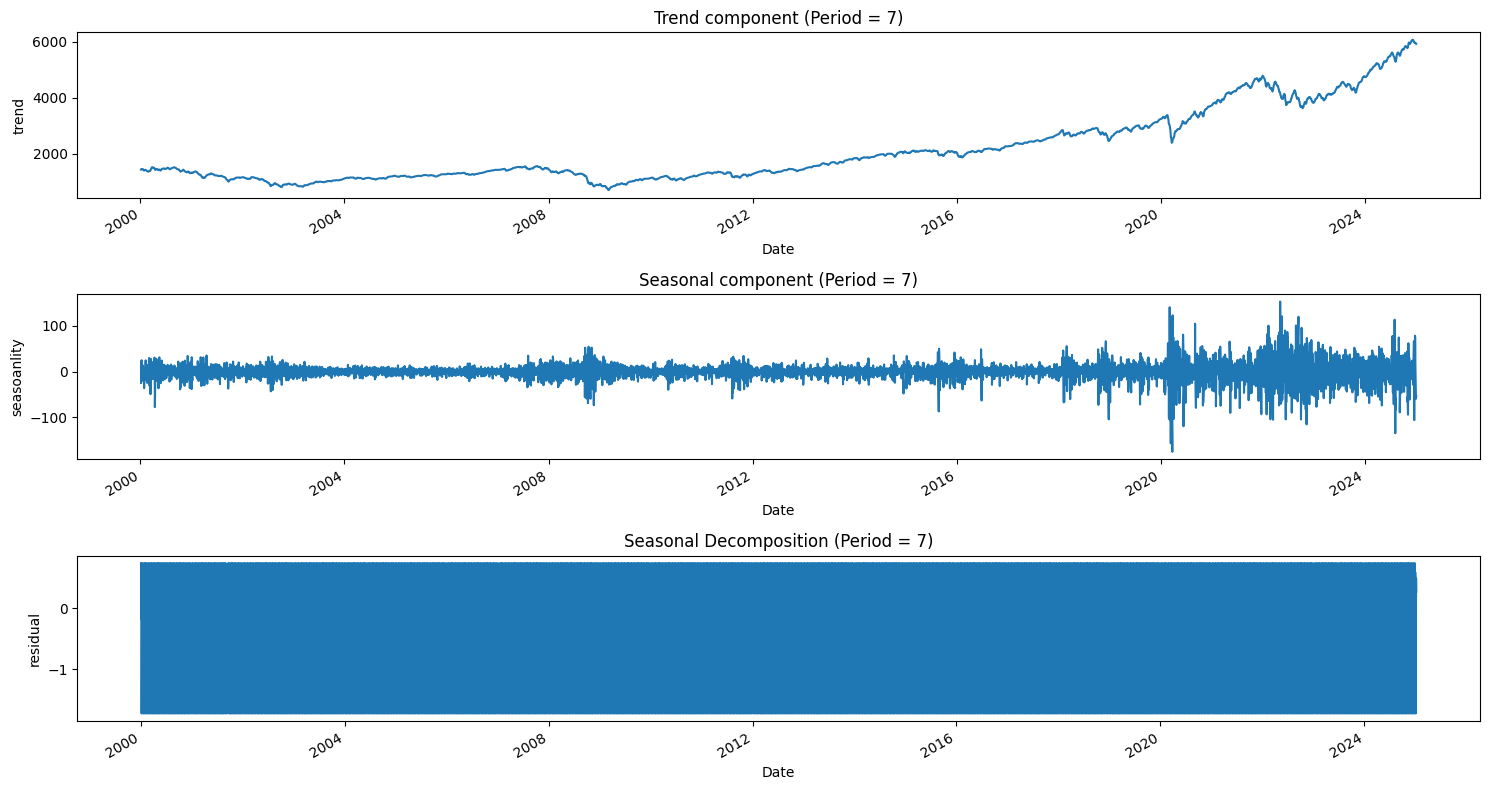

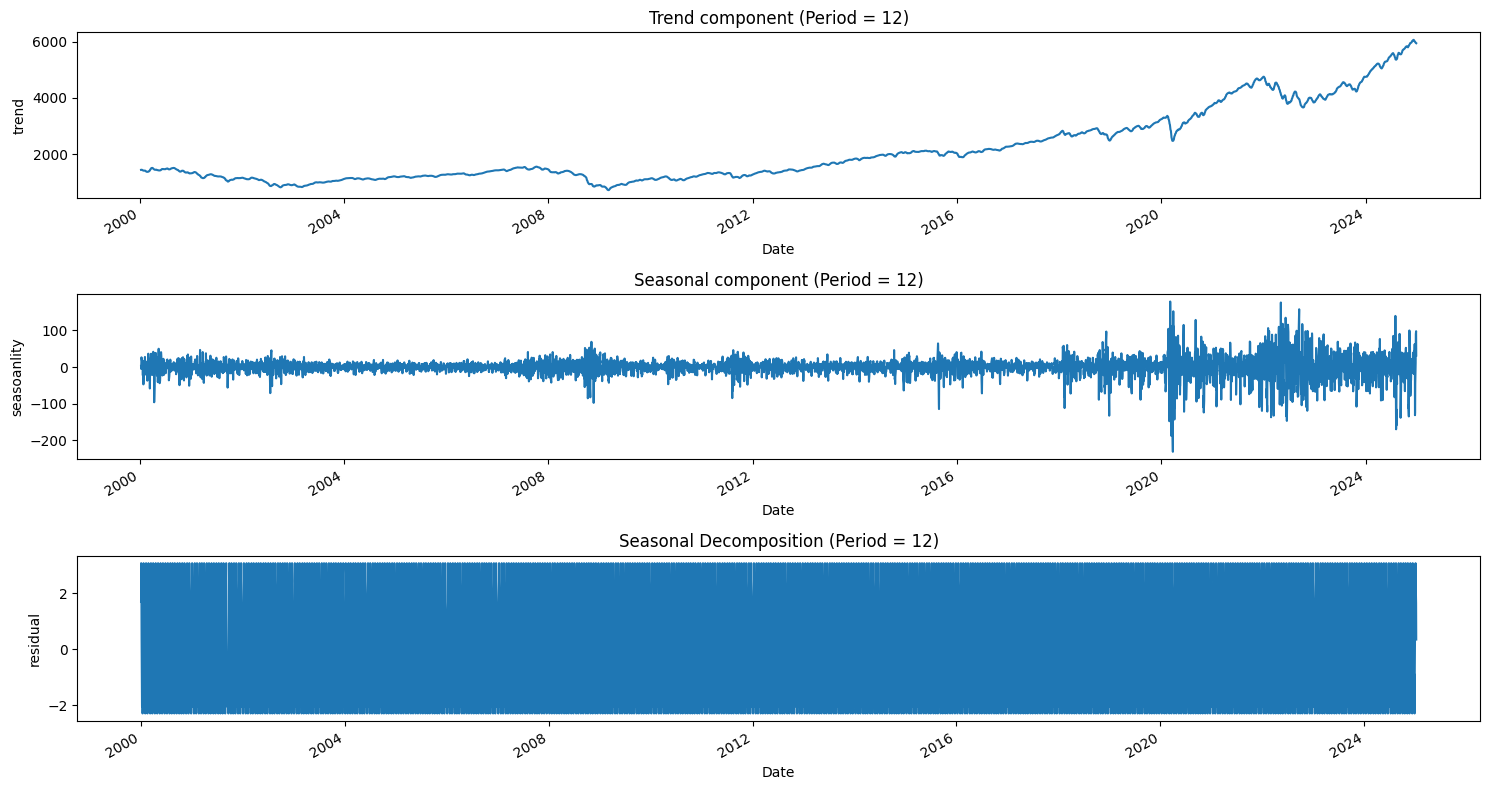

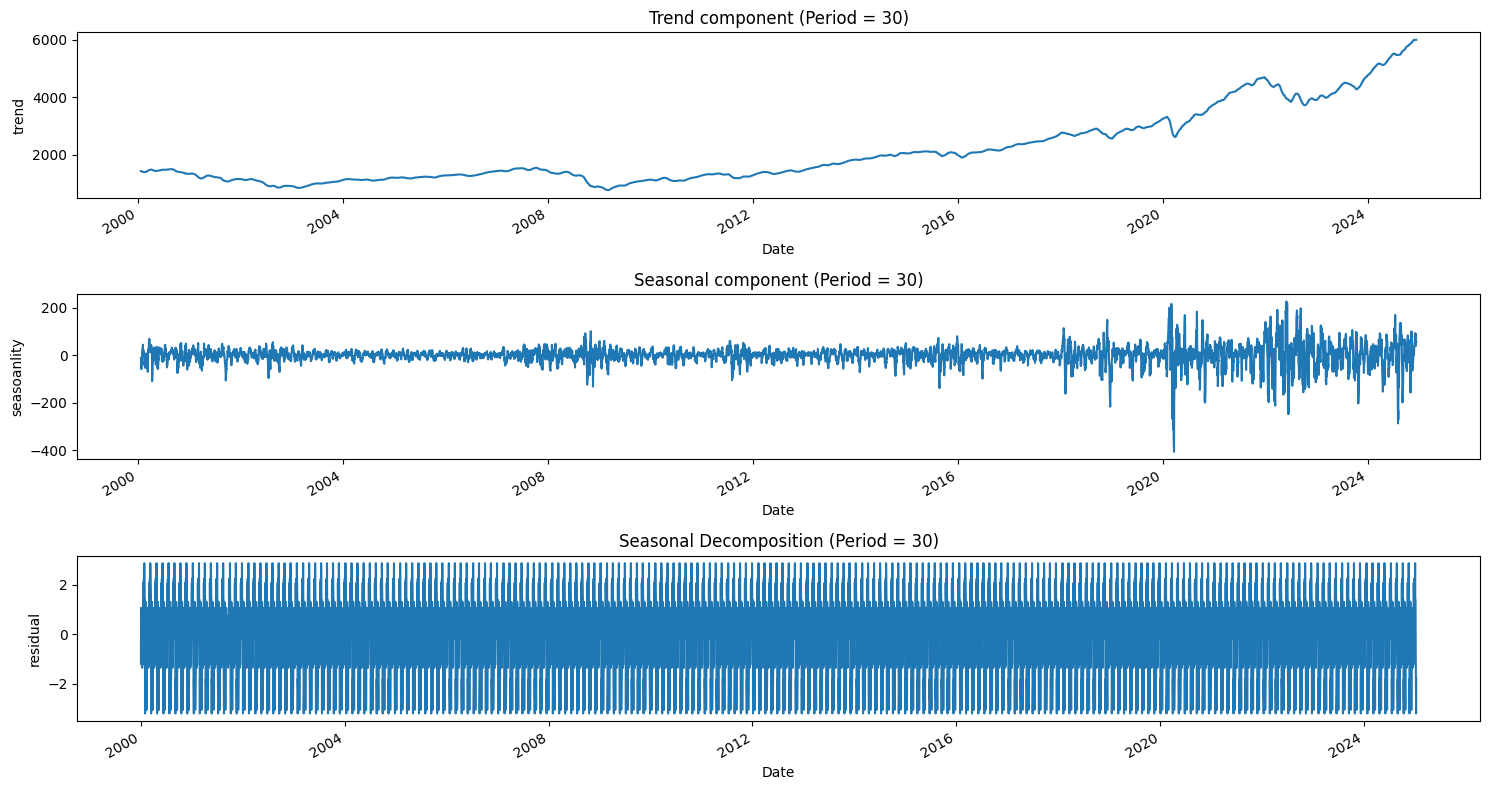

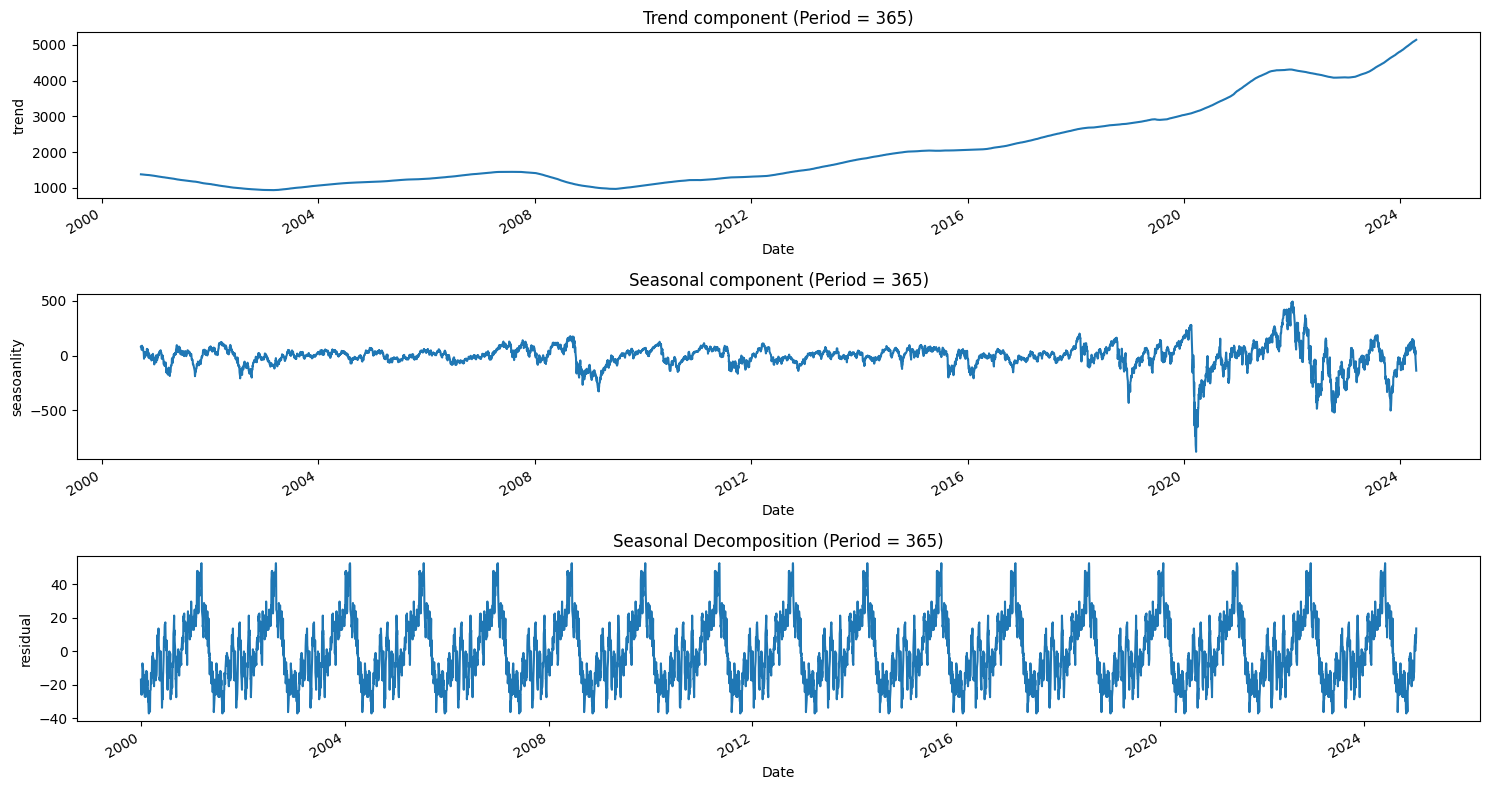

In [5]:
periods = [7, 12, 30, 365]  # Example: weekly, monthly, 30-day, yearly
for period in periods:
  res = seasonal_decompose(sp500_data['Close'], model = "additive",period = period)
  fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
  res.trend.plot(ax=ax1,ylabel = "trend")
  ax1.set_title(f"Trend component (Period = {period})")
  res.resid.plot(ax=ax2,ylabel = "seasoanlity")
  ax2.set_title(f"Seasonal component (Period = {period})")
  res.seasonal.plot(ax=ax3,ylabel = "residual")
  ax3.set_title(f"Residual component (Period = {period})")
  plt.title(f"Seasonal Decomposition (Period = {period})")
  plt.tight_layout() #adjust layout to avoid plot overlapping
  plt.show()

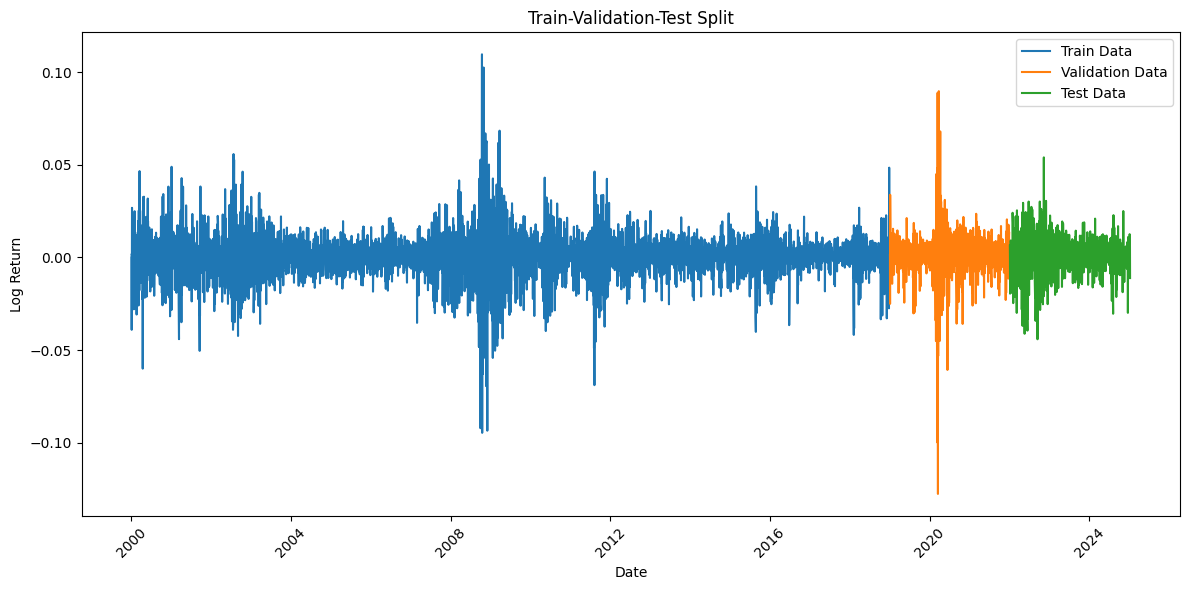

In [6]:
#train / validation / test split
train_data = sp500_data['Log Return'].loc[: '2018']
val_data = sp500_data['Log Return'].loc['2019': '2021']
test_data = sp500_data['Log Return'].loc['2022':]
train_val_data = sp500_data['Log Return'].loc[: '2021']


#visualize
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_data.index, y=train_data.values, label="Train Data")
sns.lineplot(x=val_data.index, y=val_data.values, label="Validation Data")
sns.lineplot(x=test_data.index, y=test_data.values, label="Test Data")
plt.title('Train-Validation-Test Split')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()

##Auto-ARIMA

In [ ]:
#install libraries
!pip install pmdarima

from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.3 MB/s eta 0:00:00


In [ ]:
model = auto_arima(
    train_val_data,        # Time series
    seasonal=True,         # Whether to fit a seasonal model
    m=30,                 # Number of periods in one season
    start_p=0, start_q=0,  # Initial p and q values for AR and MA components
    max_p=10, max_q=10,      # Maximum p and q values
    d=1,                   # differencing order
    start_P=0, start_Q=0,  # Initial P and Q for seasonal components
    max_P=3, max_Q=3,      # Maximum P and Q values for seasonal components
    D=1,                # Automatically determine seasonal differencing order
    trace=True,            # Print progress to console
    error_action='ignore', # Ignore errors during fit
    suppress_warnings=True,# Suppress warnings
    stepwise=False,          # Use a stepwise search for faster computation
)

 ARIMA(0,1,0)(0,1,0)[30]             : AIC=-24577.053, Time=11.30 sec
 ARIMA(0,1,0)(0,1,1)[30]             : AIC=inf, Time=47.56 sec
 ARIMA(0,1,0)(0,1,2)[30]             : AIC=inf, Time=506.24 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


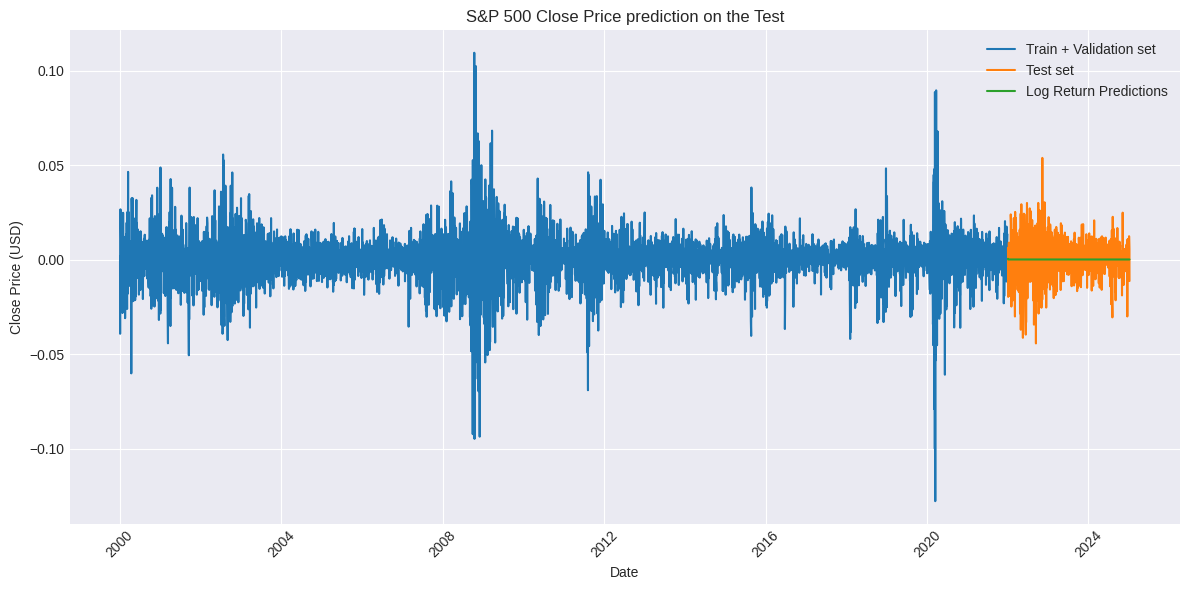

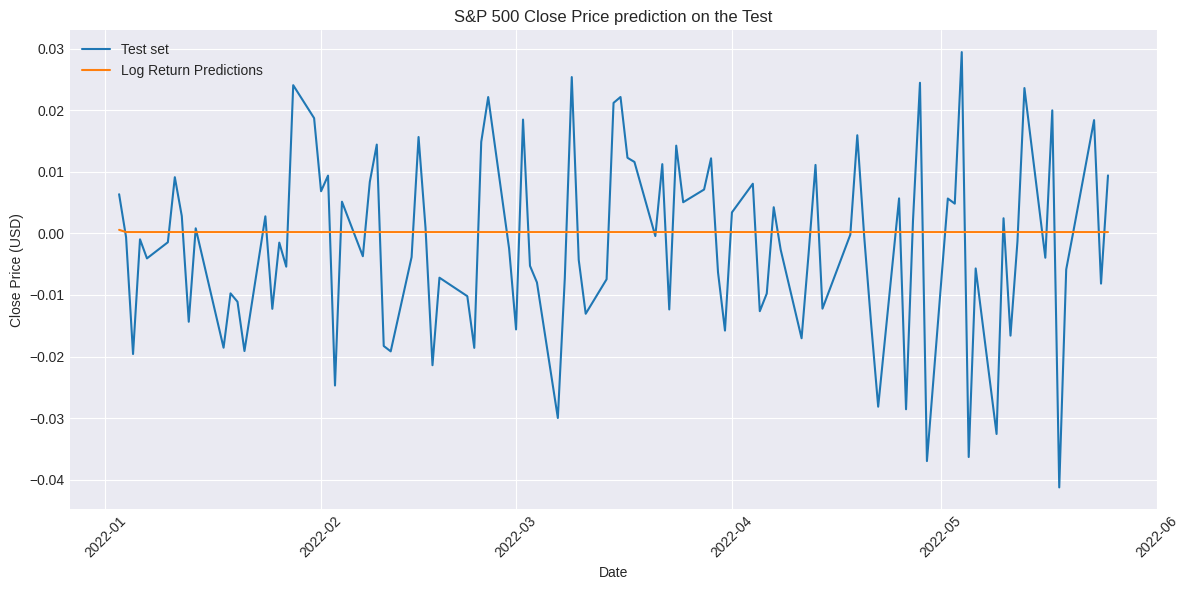

In [ ]:
#predict
forecast = model.predict(n_periods=len(test_data))
forecast.index = sp500_data.index[len(train_val_data):]


#visualize
#log predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data = train_val_data, label="Train + Validation set")
sns.lineplot(data = test_data, label="Test set")
sns.lineplot(data = forecast, label="Log Return Predictions")
plt.title('S&P 500 Close Price prediction on the Test')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#close up
plt.figure(figsize=(12, 6))
sns.lineplot(data = test_data[:100], label="Test set")
sns.lineplot(data = forecast[:100], label="Log Return Predictions")
plt.title('S&P 500 Close Price prediction on the Test')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()

##ARIMA model
The ARIMA model has three key parameters:

* p: The order of the autoregressive (AR) term.
* d: The degree of differencing to make the series stationary.
* q: The order of the moving average (MA) term.

In [ ]:
!pip install arm-mango

In [ ]:
#libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mango import scheduler #to perform Bayesian optimization
from mango.tuner import Tuner
from google.colab import drive
from joblib import Parallel, delayed, dump, load
import time

###Find the best hyperparameter using Bayesian Optimization

In [ ]:
#define objective function
def arima_objective_function (args_list):
  global train_data, test_data
  params_evaluated = [] # list that will hold the parameters tested
  results = [] # thi will hold the MSE values for each parameter set.

  for params in args_list:
      try:
          p,d,q = params['p'],params['d'], params['q']
          trend = params['trend']
          model = ARIMA(train_data, order=(p,d,q), trend = trend).fit() #train ARIMA model with the subset of hyperparameters
          predictions = model.forecast(steps=len(test_data)) #get forecast
          mse = mean_squared_error(test_data, predictions) #compute mse
          params_evaluated.append(params)
          results.append(mse)
      except:
          #print(f"Exception raised for {params}")
          #pass
          params_evaluated.append(params)
          results.append(1e5)  #if an error occurs the function appends a very large MSE (1e5) to results, which serves as a penalty for that parameter combination.

      #print(params_evaluated, mse)
  return params_evaluated, results


#define the search space
param_space = dict(p= range(6, 30),  #use of range to ensure integers
                   d=[0],
                   q =range(6, 30),
                   trend = ['n']
                  )


#run optimization
conf_Dict = {'num_iteration': 50 , 'initial_random' : 5}  #configuration dictionary , number of iteration
tuner = Tuner(param_space, arima_objective_function, conf_Dict) # Initialize Tuner
results = tuner.minimize()  #Bayesian optimization to minimize the objective function
print('best parameters:', results['best_params'])
print('best loss:', results['best_objective'])

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
#parallel bayesian optimization (https://towardsdatascience.com/mango-a-new-way-to-make-bayesian-optimisation-in-python-a1a09989c6d8)
class OptimizationMangoParallel:
  def __init__(self, njobs: int, configuration_params: dict, train_data, val_data):
      self.conf_dict = configuration_params  # parameters to configure the Tuner
      self.njobs = njobs
      self.train_data = train_data
      self.val_data = val_data
      self.space = dict(p= range(6, 30), # Definition of the search space of the algorithm
                        d=[0],
                        q =range(6, 30),  #use of range to ensure integers
                        trend = ['t']
                        )


  #This is the loss function that mango optimizes
  def arima_objetive_function(self, **params):
    params_evaluated = [] # list that will hold the parameters tested
    results = [] # thi will hold the MSE values for each parameter set.

    try:
      p,d,q = params['p'],params['d'], params['q']
      trend = params['trend']
      model = ARIMA(self.train_data, order=(p,d,q), trend = trend).fit() #train ARIMA model with the subset of hyperparameters
      predictions = model.forecast(steps=len(self.val_data)) #get forecast
      mse = mean_squared_error(self.val_data, predictions) #compute mse
      params_evaluated.append(params)
      results.append(mse)
    except:
      #print(f"Exception raised for {params}")
      #pass
      params_evaluated.append(params)
      results.append(1e5)  #if an error occurs the function appends a very large MSE (1e5) to results, which serves as a penalty for that parameter combination.
    return results


  def _objective2(self, params_batch): #to perform bayesian optimization in parallel
      global parameters
      results_batch = Parallel(self.njobs, backend="multiprocessing")(delayed(self.arima_objetive_function)(**params) for params in params_batch)
      rmse = [result for result in results_batch]
      return rmse


  def mango_optimization(self):
      tuner = Tuner(self.space, self._objective2, self.conf_dict)
      optimisation_results = tuner.minimize()
      return optimisation_results['best_params'], optimisation_results['best_objective']


 # Parallel Bayesian optimization
config_params = {'num_iteration': 50, 'initial_random': 10}
start_time = time.time()
optim = OptimizationMangoParallel(njobs=4, configuration_params=config_params, train_data=train_data, val_data=val_data)
best_parameters, best_objective = optim.mango_optimization()
print(f'The optimisation in parallel takes {(time.time() - start_time) / 60.} minutes.')

# Inspect the results
print('best parameters:', best_parameters)
print('best accuracy:', best_objective)

###ARIMA Predictions

MSE: 0.00012127754137336371
RMSE 0.01101260829110723


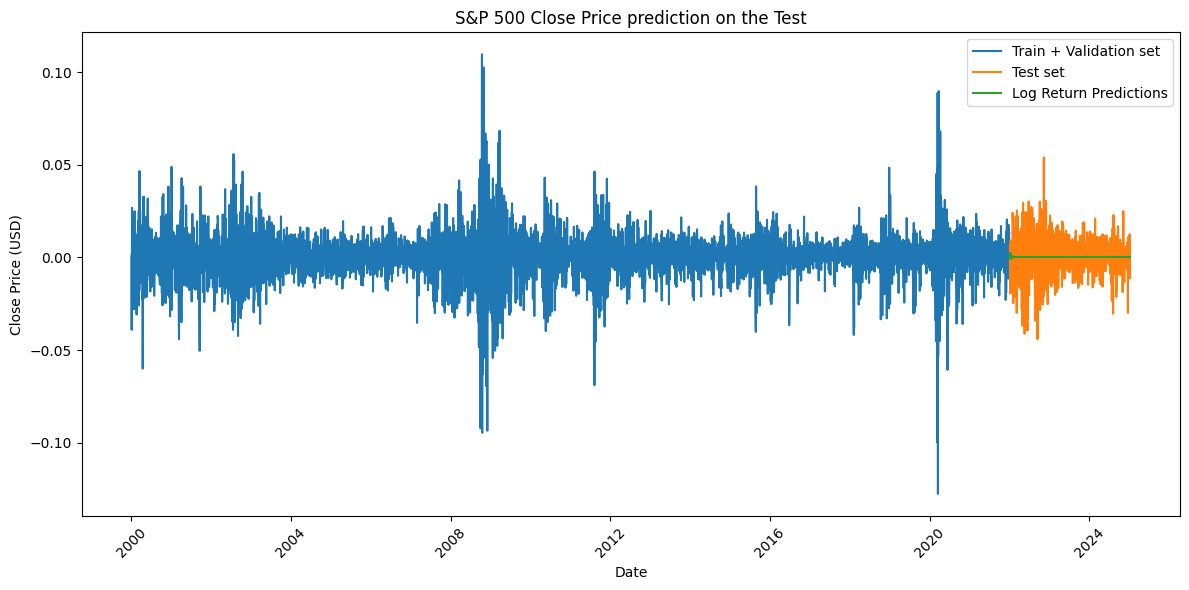

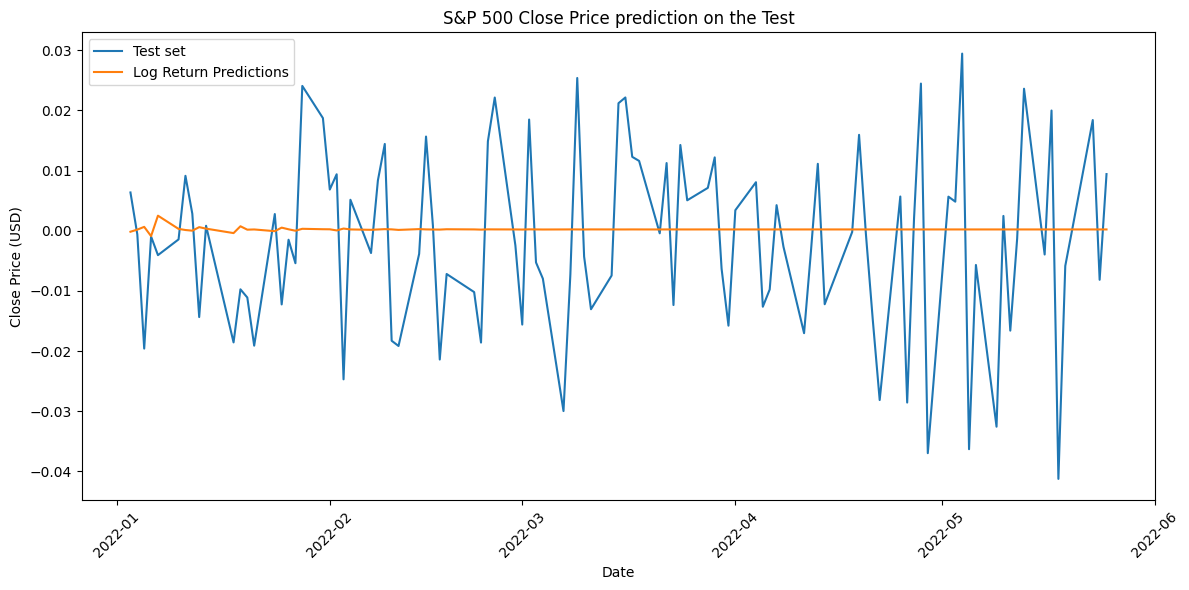

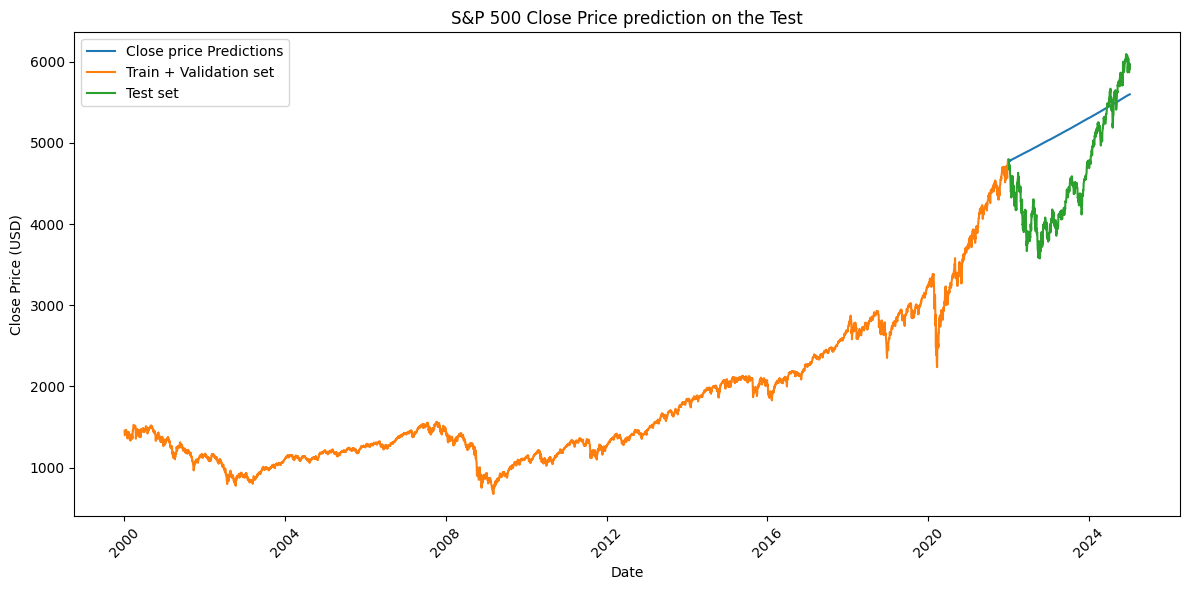

MSE:  550375.7951715495
RMSE:  741.8731664991999
MAE:  641.3280067250362
R2:  -0.2385061002297051
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
best_params = {'d': 0, 'p': 8, 'q': 13, 'trend': 'c'} #c assume a non zero mean
model = ARIMA(train_val_data, order=(best_params['p'], best_params['d'], best_params['q']), trend=best_params['trend']).fit()  #train model
forecast = model.forecast(steps=len(test_data)) ##predict
forecast.index = sp500_data.index[len(train_val_data):]
test_residuals = pd.Series((test_data.values-forecast.values))
test_residuals.index = test_data.index


#compute MSE
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE', rmse)


#visualize
#log predictions
plt.figure(figsize=(12, 6))
sns.lineplot(data = train_val_data, label="Train + Validation set")
sns.lineplot(data = test_data, label="Test set")
sns.lineplot(data = forecast, label="Log Return Predictions")
plt.title('S&P 500 Close Price prediction on the Test')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#close up
plt.figure(figsize=(12, 6))
sns.lineplot(data = test_data[:100], label="Test set")
sns.lineplot(data = forecast[:100], label="Log Return Predictions")
plt.title('S&P 500 Close Price prediction on the Test')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#cllose price predictions
forecast = pd.Series(forecast)
forecast.index = sp500_data.index[len(train_val_data):]
lista = pd.concat([train_val_data, forecast])
pd.set_option('display.float_format', '{:.6f}'.format)
initial_price = sp500_data['Close']['^GSPC'].iloc[0]
predicted_close_price = initial_price * np.exp(lista.cumsum())
predicted_close_price

plt.figure(figsize=(12, 6))
sns.lineplot(data = predicted_close_price[len(train_val_data):], label="Close price Predictions")
sns.lineplot(data = sp500_data['Close']['^GSPC'][:len(train_val_data)], label="Train + Validation set")
sns.lineplot(x=sp500_data[len(train_val_data):].index, y=sp500_data['Close'][len(train_val_data):].squeeze(), label="Test set")
plt.title('S&P 500 Close Price prediction on the Test')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#compute metrics
mse = mean_squared_error(sp500_data['Close']['^GSPC'][len(train_val_data):], predicted_close_price[len(train_val_data):])
rmse = np.sqrt(mse)
mae = mean_absolute_error(sp500_data['Close']['^GSPC'][len(train_val_data):], predicted_close_price[len(train_val_data):])
r2 = r2_score(sp500_data['Close']['^GSPC'][len(train_val_data):], predicted_close_price[len(train_val_data):])
print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)


#save arima predictions
drive.mount("/content/gdrive")
file_path = '/content/gdrive/MyDrive/università/Machine_learning/Project_code/ARIMA/arima_predictions.csv'
df_arima_predictions = pd.Series(predicted_close_price[len(train_val_data):], index = sp500_data.index[len(train_val_data):])
df_arima_predictions.to_csv(file_path, index=True)


arima model: (8, 0, 13) c
MSE: 0.00014961930860154214
RMSE: 0.012231897179159991
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


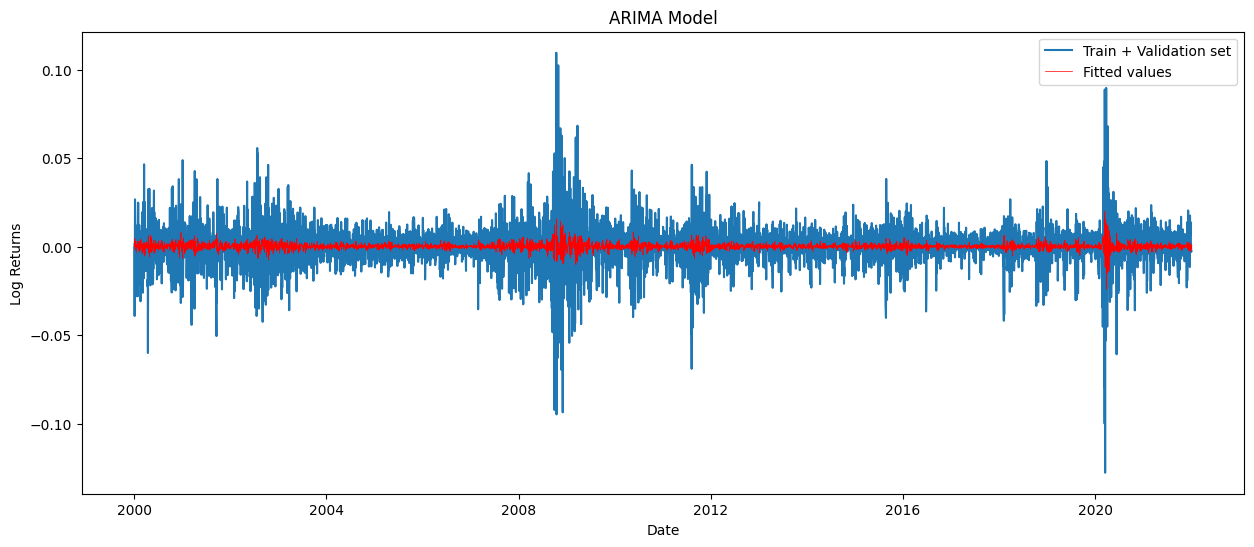

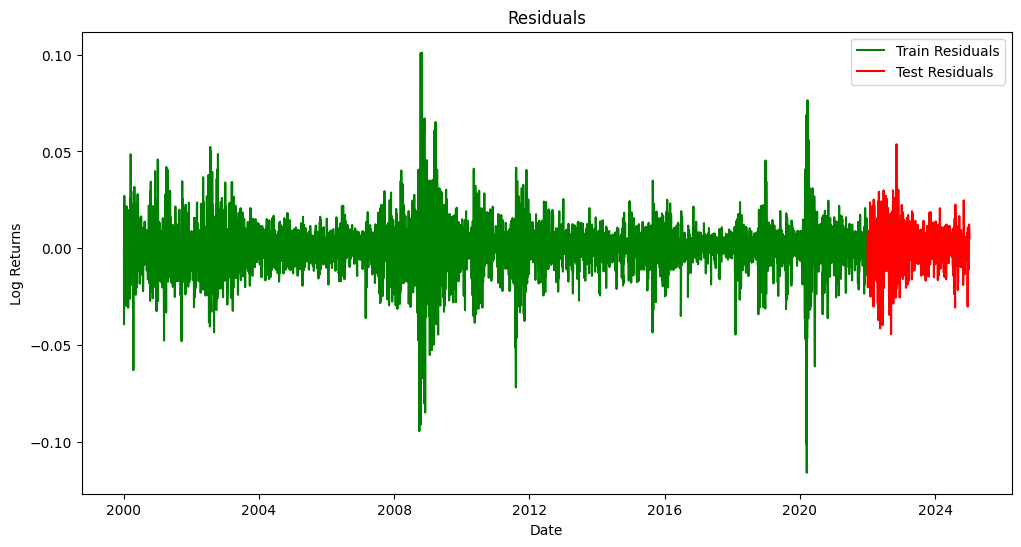

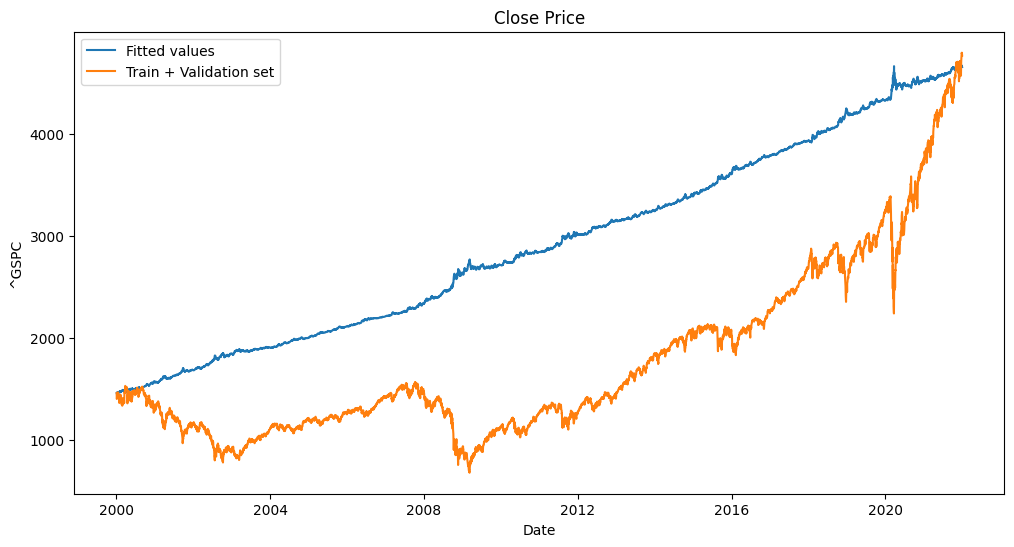

In [ ]:
def plot_arima(data, order , trend):
  print('arima model:', order, trend)
  model = ARIMA(data, order=order, trend = trend)
  results = model.fit()
  train_residuals = results.resid  #residuals
  mse = mean_squared_error(data, results.fittedvalues)
  rmse = np.sqrt(mse)
  print('MSE:', mse)
  print('RMSE:', rmse)


  #save residuals on google drive
  drive.mount("/content/gdrive")
  df_log_return_residuals = pd.concat([train_residuals, test_residuals]).rename('Residuals')
  df_log_return_residuals.index = sp500_data.index
  file_path = '/content/gdrive/MyDrive/università/Machine_learning/Project_code/ARIMA/log_return_residuals.csv'
  df_log_return_residuals.to_csv(file_path, index=True)


  #log return prediction on train + val set
  f = plt.figure()
  f.set_figwidth(15)
  f.set_figheight(6)
  plt.plot(data, label = "Train + Validation set")
  plt.plot(results.fittedvalues, color='red', label = "Fitted values", linewidth=0.5)
  plt.legend()
  plt.title('ARIMA Model')
  plt.xlabel('Date')
  plt.ylabel('Log Returns')
  plt.show()


  #residuals
  plt.figure(figsize=(12, 6))
  plt.plot(results.resid, color = 'green', label = "Train Residuals")
  plt.plot(test_residuals, color = 'red', label = "Test Residuals")
  plt.legend()
  plt.title('Residuals')
  plt.xlabel('Date')
  plt.ylabel('Log Returns')
  plt.show()

  #convert log returns back into close prices
  initial_price = sp500_data['Close']['^GSPC'].iloc[0]
  fitted_close_price = initial_price * np.exp(results.fittedvalues.cumsum())
  plt.figure(figsize=(12, 6))
  plt.title('ARIMA Model results using close prices')
  sns.lineplot(data=fitted_close_price, label="Fitted values")
  sns.lineplot(x=sp500_data[:len(train_val_data)].index, y=sp500_data['Close'][:len(train_val_data)].squeeze(), label="Train + Validation set")
  plt.title('Close Price')
  plt.xlabel('Date')
  plt.show


  #save fitted values on google drive
  fitted_close_price = pd.Series(fitted_close_price, index = train_val_data.index)
  file_path = '/content/gdrive/MyDrive/università/Machine_learning/Project_code/ARIMA/fitted_values.csv'
  fitted_close_price.to_csv(file_path, index=True)

  return fitted_close_price



#train ARIMA on test set and compute residuals
#best_params = {'d': 0, 'p': 10, 'q': 12, 'trend': 't'} #best model found using Bayesian Optimization
best_params = {'d': 0, 'p': 8, 'q': 13, 'trend': 'c'}

order=(best_params['p'], best_params['d'], best_params['q'])
trend=best_params['trend']
fitted_close_price = plot_arima(train_val_data, order, trend)


###Compute Residuals on the Close prices

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


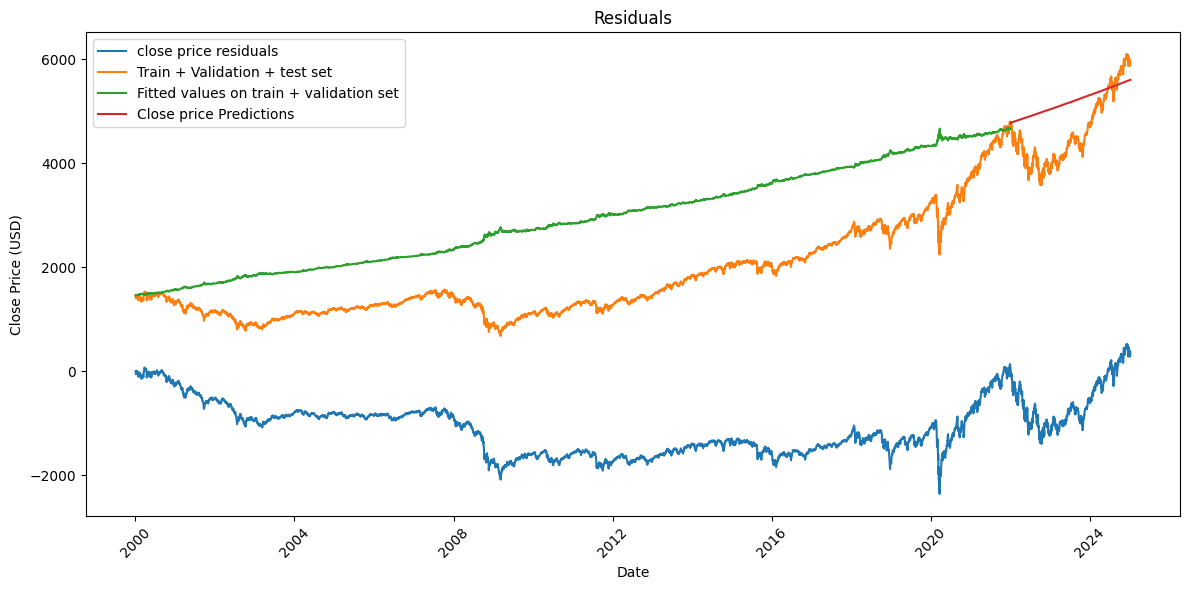

In [ ]:
#mount google drive
drive.mount("/content/gdrive")


#compute residual both on the train-val set and on the test set
close_price_residuals_train_val = pd.Series(sp500_data['Close'][:len(train_val_data)].values.squeeze() - fitted_close_price.values)
close_price_residuals_test = pd.Series(sp500_data['Close'][len(train_val_data):].values.squeeze() - predicted_close_price[len(train_val_data):].values)
close_price_residuals = pd.concat([close_price_residuals_train_val, close_price_residuals_test])
close_price_residuals.index = sp500_data.index
close_price_residuals


#visualize
plt.figure(figsize=(12, 6))
sns.lineplot(data = close_price_residuals, label="close price residuals")
sns.lineplot(x=sp500_data.index, y=sp500_data['Close'].squeeze(), label="Train + Validation + test set")
sns.lineplot(data=fitted_close_price, label="Fitted values on train + validation set")
sns.lineplot(data = predicted_close_price[len(train_val_data):], label="Close price Predictions")

plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#upload close price reisduals on google drive
file_path = '/content/gdrive/MyDrive/università/Machine_learning/Project_code/ARIMA/close_price_residuals.csv'
close_price_residuals.to_csv(file_path, index=True)


###Save/Load pretrained model

In [ ]:
#save model
drive.mount("/content/gdrive")
file_path = '/content/gdrive/MyDrive/università/Tesi/models/arima_model.joblib'
dump(model, file_path)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['/content/gdrive/MyDrive/università/Tesi/models/arima_model.joblib']

In [ ]:
# Load the saved ARIMA model
drive.mount("/content/gdrive")
file_path = '/content/gdrive/MyDrive/università\Tesi\models/arima_model.joblib'
model = load(file_path)

##Naive estimator

MSE: 0.00012121074159287768
RMSE 0.011009574996014954


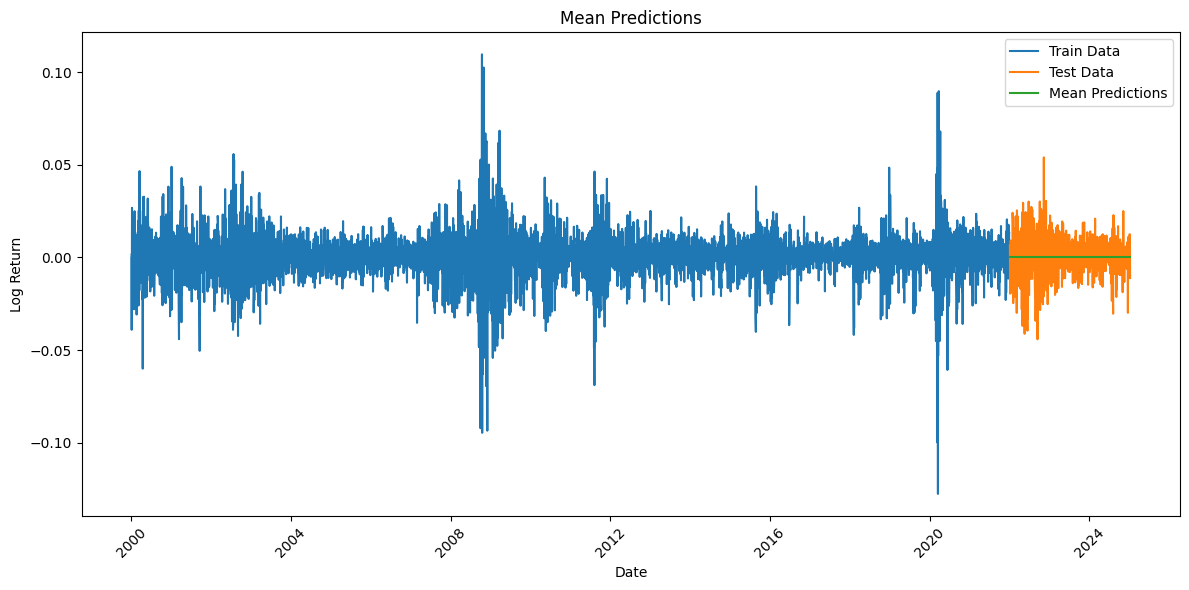

In [ ]:
class naive_estimator:
    def __init__(self):
        self.mean_value = None  # Initialize mean

    def fit(self, train_data):
        self.mean_value = np.mean(train_data)

    def predict(self, test_data):
        return np.full(len(test_data), self.mean_value)  # Creates array of mean values


mean_esitmator = naive_estimator()
mean_esitmator.fit(train_val_data)
predictions = mean_esitmator.predict(test_data)

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE', rmse)


#visualize
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_val_data.index, y=train_val_data.values, label="Train Data")
sns.lineplot(x=test_data.index, y=test_data.values, label="Test Data")
sns.lineplot(x=test_data.index, y=predictions, label="Mean Predictions")
plt.title('Mean Predictions')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()

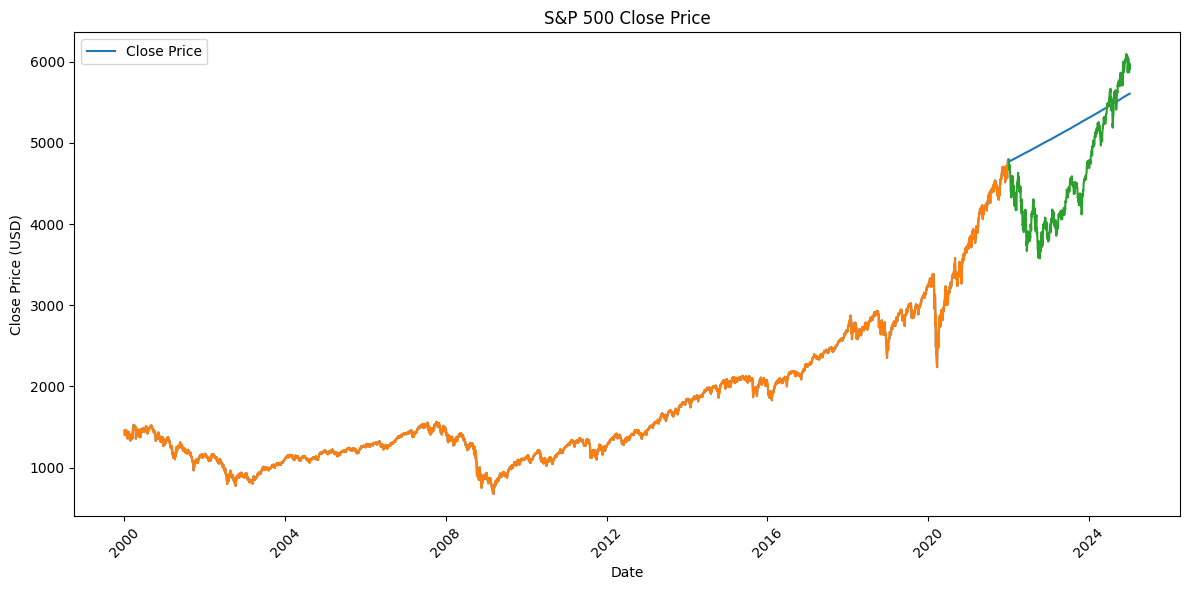

MSE:  548222.0515510719
RMSE:  740.4201858074049
MAE:  639.7047038107147
R2:  -0.23365954877214912


In [ ]:
lista = list(train_val_data)
lista.extend(predictions)
lista = pd.Series(lista)
pd.set_option('display.float_format', '{:.6f}'.format)

initial_price = sp500_data['Close']['^GSPC'].iloc[0]
predicted_close_price = initial_price * np.exp(lista.cumsum())
predicted_close_price


#visualize
plt.figure(figsize=(12, 6))
sns.lineplot(x=sp500_data.index, y=predicted_close_price, label="Predictions")
sns.lineplot(x=sp500_data[:len(train_val_data)].index, y=sp500_data['Close'][:len(train_val_data)].squeeze(), label="Train set")
sns.lineplot(x=sp500_data[len(train_val_data):].index, y=sp500_data['Close'][len(train_val_data):].squeeze(), label="Test set")
plt.title('S&P 500 Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend( labels=["Close Price"])
plt.show()


#compute metrics
mse = mean_squared_error(sp500_data['Close']['^GSPC'][len(train_val_data):], predicted_close_price[len(train_val_data):])
rmse = np.sqrt(mse)
mae = mean_absolute_error(sp500_data['Close']['^GSPC'][len(train_val_data):], predicted_close_price[len(train_val_data):])
r2 = r2_score(sp500_data['Close']['^GSPC'][len(train_val_data):], predicted_close_price[len(train_val_data):])
print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)
print('R2: ', r2)


#SARIMA model

In [7]:
#libraries
import statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

#suppress warngings
warnings.filterwarnings("ignore", category=ValueWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

##Hyperparameters tuning using Bayesian Optimization

In [ ]:
!pip install arm-mango

In [ ]:
#libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mango import scheduler #to perform Bayesian optimization
from mango.tuner import Tuner
from google.colab import drive
from joblib import Parallel, delayed, dump, load
import time

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<fro

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#parallel bayesian optimization
class OptimizationMangoParallel:
  def __init__(self, njobs: int, configuration_params: dict, train_data, val_data):
      self.conf_dict = configuration_params  # parameters to configure the Tuner
      self.njobs = njobs
      self.train_data = train_data
      self.val_data = val_data
      self.space = dict(p= range(0, 10), # Definition of the search space of the algorithm
                        d=[1],
                        q =range(0, 10),  #use of range to ensure integers
                        # trend = ['n', 'c'],
                        trend = ['n'],
                        Q = range(0, 5),
                        P = range(0, 5),
                        # Q = [1],
                        # P = [1],
                        D = [1],
                        periods = [30]
                        )


  #This is the loss function that mango optimizes
  def arima_objetive_function(self, **params):

    try:
        p,d,q = params['p'],params['d'], params['q']
        trend = params['trend']
        Q, P, D, periods = params['Q'], params['P'], params['D'], params['periods']
        print(f"training model: SARIMA ({p,d,q}), ({P,D,Q}), {trend}")
        model = ARIMA(self.train_data, order=(p,d,q), trend = trend,  seasonal_order = (P, D, Q, periods)).fit(method='innovations_mle', low_memory=True, cov_type='none') #train ARIMA model with the subset of hyperparameters
        # print("model has finished to train")
        predictions = model.forecast(steps=len(self.val_data)) #get forecast
        rmse = np.sqrt(mean_squared_error(self.val_data, predictions))  #compute rmse
        return mse
    except Exception as e:
        print(f"Error with params {params}: {e}")
        return 1e5  # Penalize error cases


  def _objective2(self, params_batch): #to perform bayesian optimization in parallel
      global parameters
      results_batch = Parallel(self.njobs, backend="threading")(delayed(self.arima_objetive_function)(**params) for params in params_batch)
      rmse = [result for result in results_batch]
      return rmse


  def mango_optimization(self):
      tuner = Tuner(self.space, self._objective2, self.conf_dict)
      optimisation_results = tuner.minimize()
      return optimisation_results['best_params'], optimisation_results['best_objective']


 # Parallel Bayesian optimization
config_params = {'num_iteration': 20, 'initial_random': 4}
start_time = time.time()
optim = OptimizationMangoParallel(njobs=4, configuration_params=config_params, train_data=train_data, val_data=val_data)
best_parameters, best_objective = optim.mango_optimization()
print(f'The optimisation in parallel takes {(time.time() - start_time) / 60.} minutes.')

# Inspect the results
print('best parameters:', best_parameters)
print('best accuracy:', best_objective)

training model: SARIMA ((9, 1, 2)), ((0, 1, 3)), n
training model: SARIMA ((4, 1, 9)), ((0, 1, 0)), n
training model: SARIMA ((6, 1, 5)), ((4, 1, 0)), n
training model: SARIMA ((6, 1, 1)), ((4, 1, 1)), n


##Inference

In [ ]:
# best parameters: {'trend': 'n', 'q': 9, 'periods': 30, 'p': 3, 'd': 1, 'Q': 2, 'P': 3, 'D': 1}

#p represent the number of lagged observations used as predictors in the model.
#q epresents the number of lagged forecast errors used in the model.

#P represents the number of seasonal autoregressive (SAR) terms in the model.
#Q 2epresents the number of seasonal moving average (SMA) terms in the model.


model = ARIMA(train_val_data, order=(5, 1, 1), trend = 'n', seasonal_order=(1, 1, 1, 30)).fit(method='innovations_mle', low_memory=True, cov_type='none')
forecast = model.forecast(steps=len(test_data)) #predict

Rolling predictions

In [ ]:
#rolling predictions
history = list(train_val_data)
forecasts = []
total_steps=0
model = ARIMA(history, order=(5, 1, 1), trend = 'n', seasonal_order=(1, 1, 1, 30)).fit(method='innovations_mle', low_memory=True, cov_type='none')

for i in range(len(test_data)):
    # steps = 10 if i < len(test_data) // 10 else len(test_data) % 10
    total_steps += 1;
    forecast = model.forecast(steps=1)[0]  # Forecast 1 step ahead
    forecasts.append(forecast)

    history.append(test_data.iloc[i])  # Add the actual value to the history

    # Re-fit the model on the updated data
    model = ARIMA(history, order=(5, 1, 1), trend = 'n', seasonal_order=(1, 1, 1, 30)).fit(method='innovations_mle', low_memory=True, cov_type='none')

    #verbose
    print(f"step: {total_steps}, forecast: {forecast}, actual: {test_data.iloc[i]}")


forecast = pd.Series(forecasts)
forecast.index = sp500_data.index[len(train_val_data):]
forecast


#test predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_val_data.index, y=train_val_data.values, label="Train + Validation Data")
sns.lineplot(x=test_data.index, y=test_data.values, label="Test Data")
sns.lineplot( data = forecast)
plt.title('SARIMA model test predictions (log returns)')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#cllose price predictions
forecast = pd.Series(forecast)
forecast.index = sp500_data.index[len(train_val_data):]
lista = pd.concat([train_val_data, forecast])
pd.set_option('display.float_format', '{:.6f}'.format)
initial_price = sp500_data['Close']['^GSPC'].iloc[0]
predicted_close_price = initial_price * np.exp(lista.cumsum())
predicted_close_price

plt.figure(figsize=(12, 6))
sns.lineplot(data = predicted_close_price[len(train_val_data):], label="Close price Predictions")
sns.lineplot(data = sp500_data['Close']['^GSPC'][:len(train_val_data)], label="Train + Validation set")
sns.lineplot(x=sp500_data[len(train_val_data):].index, y=sp500_data['Close'][len(train_val_data):].squeeze(), label="Test set")
plt.title('SARIMA model test predictions (close price)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#save predictions
file_path = '/content/gdrive/MyDrive/università/Machine_learning/Project_code/ARIMA/SARIMA_test_predictions.csv'
forecast.to_csv(file_path, index=True)

step: 1, forecast: 0.00035984479376463844, actual: 0.006353824170388397
step: 2, forecast: 0.002781962429853245, actual: -0.0006298202522032699
step: 3, forecast: 0.0016900230348793652, actual: -0.019583264304501073
step: 4, forecast: 0.0026731340267817164, actual: -0.0009642337401809882
step: 5, forecast: 0.0007852451602755756, actual: -0.004058441082336512
step: 6, forecast: -0.00010127928352877957, actual: -0.0014420705375388979
step: 7, forecast: 0.00268519793596992, actual: 0.009118286452399373
step: 8, forecast: -0.0002778775055424926, actual: 0.0028137920146670695
step: 9, forecast: 0.000981175428145133, actual: -0.014346029234400533
step: 10, forecast: 0.00447932063183166, actual: 0.0008196442695905652
step: 11, forecast: 0.0003790473834358772, actual: -0.0185591053980085
step: 12, forecast: 0.001937780561158007, actual: -0.009736790941460195
step: 13, forecast: 0.0037297278366097237, actual: -0.011098742304330734
step: 14, forecast: 0.0006921051378542056, actual: -0.0190959953

In [ ]:
#rolling predictions
data = pd.concat([train_val_data, test_data[:717]])
history = list(data)
forecasts = []
total_steps= 716
model = ARIMA(history, order=(5, 1, 1), trend = 'n', seasonal_order=(1, 1, 1, 30)).fit(method='innovations_mle', low_memory=True, cov_type='none')

for i in range(716, len(test_data)):
    # steps = 10 if i < len(test_data) // 10 else len(test_data) % 10
    total_steps += 1
    forecast = model.forecast(steps=1)[0]  # Forecast 1 step ahead
    forecasts.append(forecast)

    history.append(test_data.iloc[i])  # Add the actual value to the history

    # Re-fit the model on the updated data
    model = ARIMA(history, order=(5, 1, 1), trend = 'n', seasonal_order=(1, 1, 1, 30)).fit(method='innovations_mle', low_memory=True, cov_type='none')

    #verbose
    print(f"step: {total_steps}, forecast: {forecast}, actual: {test_data.iloc[i]}")

step: 717, forecast: -0.0009257079496851461, actual: 0.007403754173995657
step: 718, forecast: 0.0006436376111498138, actual: 0.0037497940357180464
step: 719, forecast: -0.0007138407174302301, actual: 0.0009685941909569238
step: 720, forecast: -0.0006838979633272662, actual: -0.0028968514769364996
step: 721, forecast: 0.003482757020017405, actual: 0.00023220076414018386
step: 722, forecast: 0.001259534128984224, actual: -0.006068108582244
step: 723, forecast: 0.0010028115916007468, actual: -0.013291430866793769
step: 724, forecast: 0.0016250856806316397, actual: 0.003910159746206537
step: 725, forecast: -0.0009263655947204957, actual: 0.003955750520596487
step: 726, forecast: 0.0016891569616768291, actual: 2.19506213354446e-05
step: 727, forecast: 0.0011928965144723611, actual: 0.005326251844288491
step: 728, forecast: 0.0008336982240183871, actual: 0.0034619595915364653
step: 729, forecast: 0.0021585692942894495, actual: 0.0030159278201245415
step: 730, forecast: 0.0002119981990041427

Test predicion

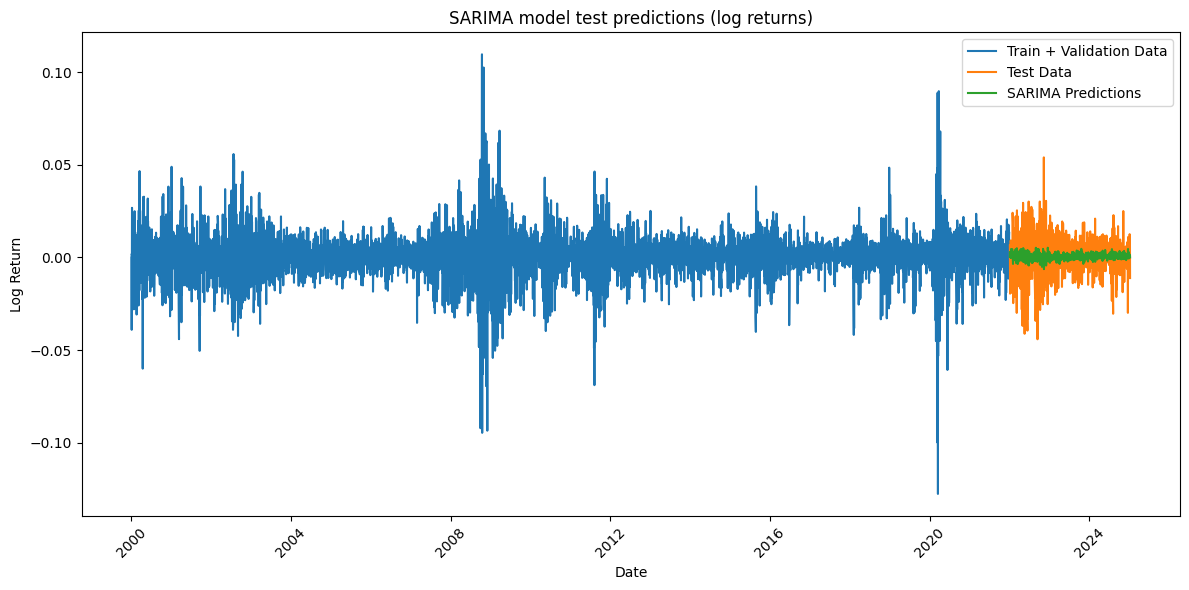

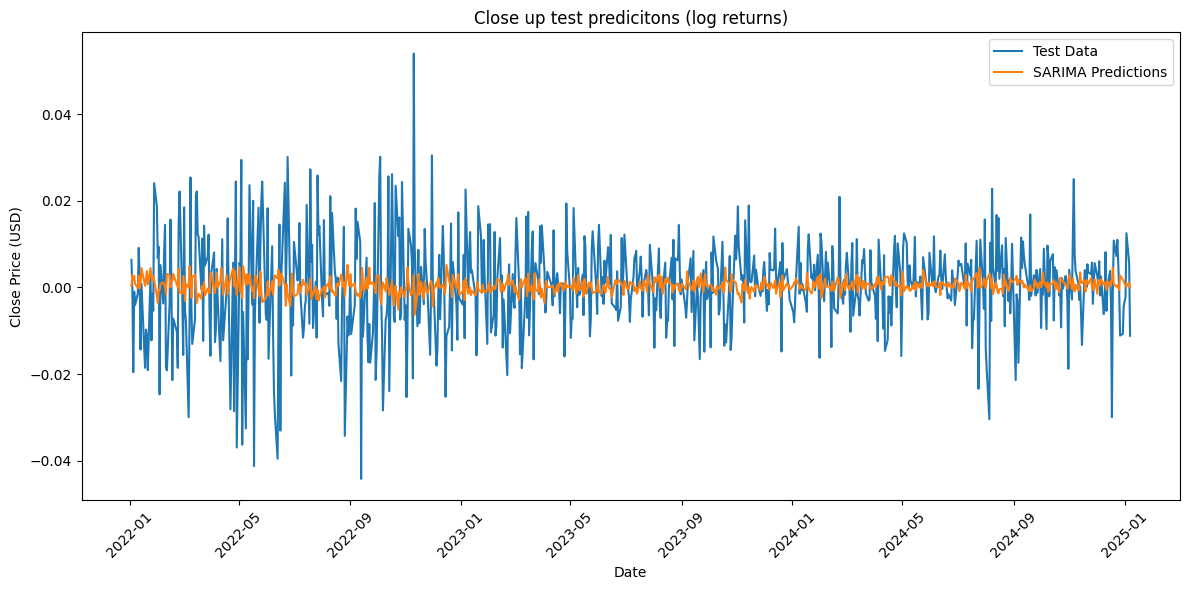

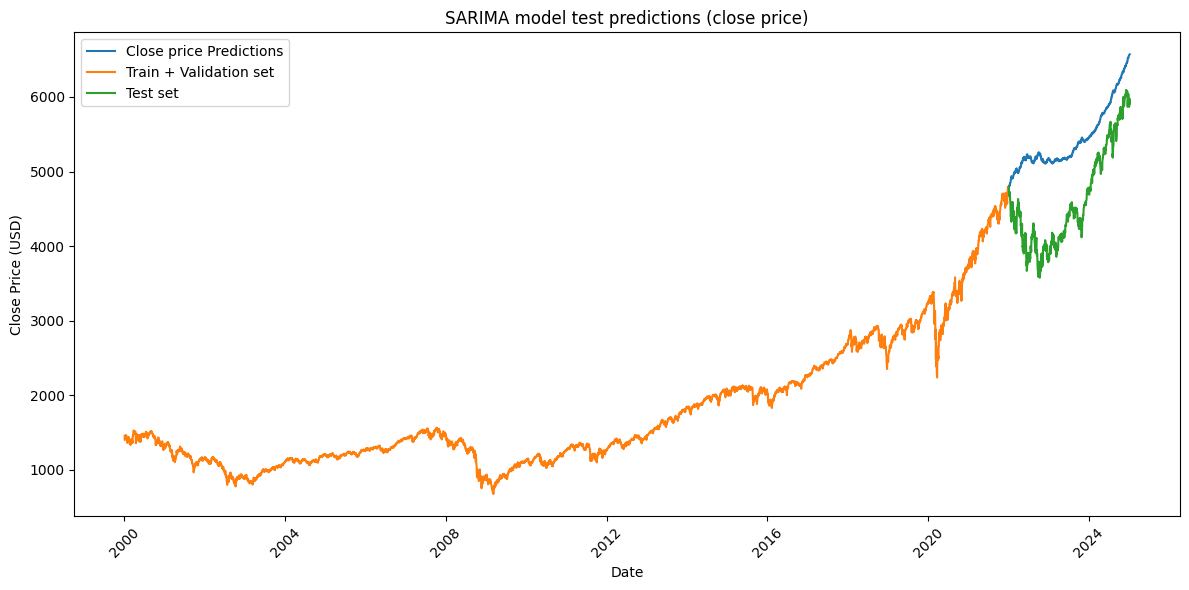

RMSE: 894.6204317776196
Mean Squared Error: 800345.7169539746
Mean Absolute Error: 826.8709507048625
R2 Score: -3.3939292781612336


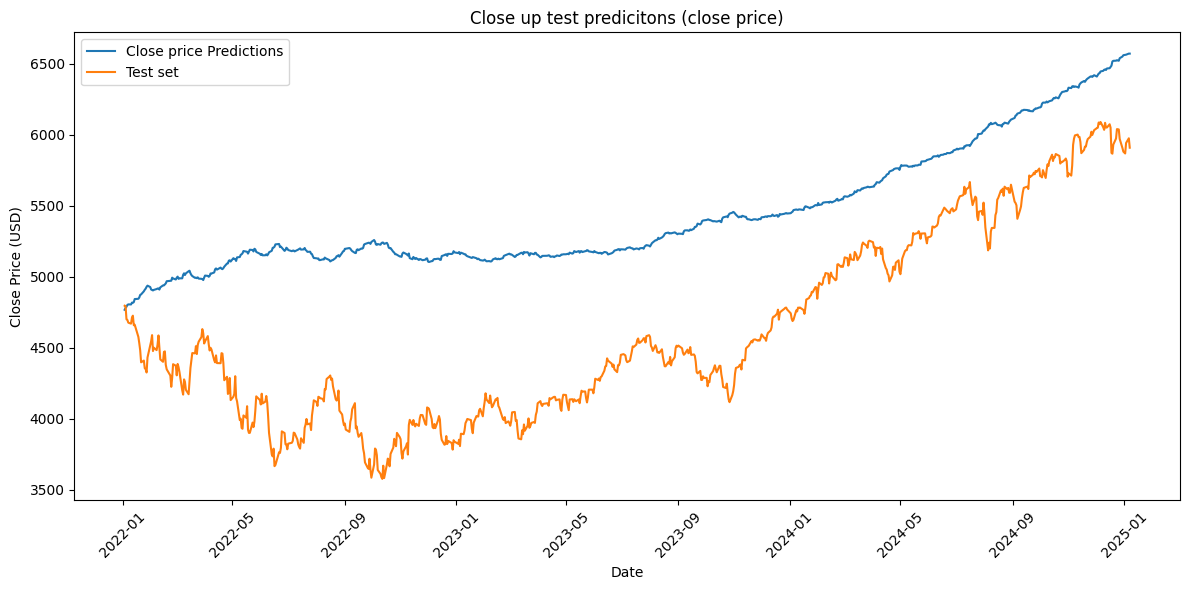

In [8]:
#get SARIMA test predictions
forecast = pd.read_csv('/content/gdrive/MyDrive/università/Machine_learning/Project_code/ARIMA/SARIMA_test_predictions.csv', sep= ";")

#test predictions
plt.figure(figsize=(12, 6))
sns.lineplot(x=train_val_data.index, y=train_val_data.values, label="Train + Validation Data")
sns.lineplot(x=test_data.index, y=test_data.values, label="Test Data")
sns.lineplot(x=test_data.index, y=forecast.iloc[:,0], label="SARIMA Predictions")
plt.title('SARIMA model test predictions (log returns)')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#close up
plt.figure(figsize=(12, 6))
sns.lineplot(x=test_data.index, y=test_data.values, label="Test Data")
sns.lineplot(x=test_data.index, y=forecast.iloc[:,0], label="SARIMA Predictions")
plt.title('Close up test predicitons (log returns)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#price predictions
forecast = pd.Series(forecast.iloc[:,0])
forecast.index = sp500_data.index[len(train_val_data):]
lista = pd.concat([train_val_data, forecast])
pd.set_option('display.float_format', '{:.6f}'.format)
initial_price = sp500_data['Close']['^GSPC'].iloc[0]
predicted_close_price = initial_price * np.exp(lista.cumsum())
predicted_close_price

plt.figure(figsize=(12, 6))
sns.lineplot(data = predicted_close_price[len(train_val_data):], label="Close price Predictions")
sns.lineplot(data = sp500_data['Close']['^GSPC'][:len(train_val_data)], label="Train + Validation set")
sns.lineplot(x=sp500_data[len(train_val_data):].index, y=sp500_data['Close'][len(train_val_data):].squeeze(), label="Test set")
plt.title('SARIMA model test predictions (close price)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#compute metrics
mse = mean_squared_error(predicted_close_price[len(train_val_data):], sp500_data['Close'][len(train_val_data):])
rmse = np.sqrt(mse)
mae = mean_absolute_error(predicted_close_price[len(train_val_data):], sp500_data['Close'][len(train_val_data):])
r2 = r2_score(predicted_close_price[len(train_val_data):], sp500_data['Close'][len(train_val_data):])

print(f'RMSE: {rmse}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')


#close up
plt.figure(figsize=(12, 6))
sns.lineplot(data = predicted_close_price[len(train_val_data):], label="Close price Predictions")
sns.lineplot(x=sp500_data[len(train_val_data):].index, y=sp500_data['Close'][len(train_val_data):].squeeze(), label="Test set")
plt.title('Close up test predicitons (close price)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#save close price test predictions
# SARIMA_predictions = pd.Series(forecast, index = sp500_data.index[len(train_val_data):])
# file_path = '/content/gdrive/MyDrive/università/Machine_learning/Project_code/ARIMA/SARIMA_test_predictions.csv'
# SARIMA_predictions.to_csv(file_path, index=True)

Train Val predictions

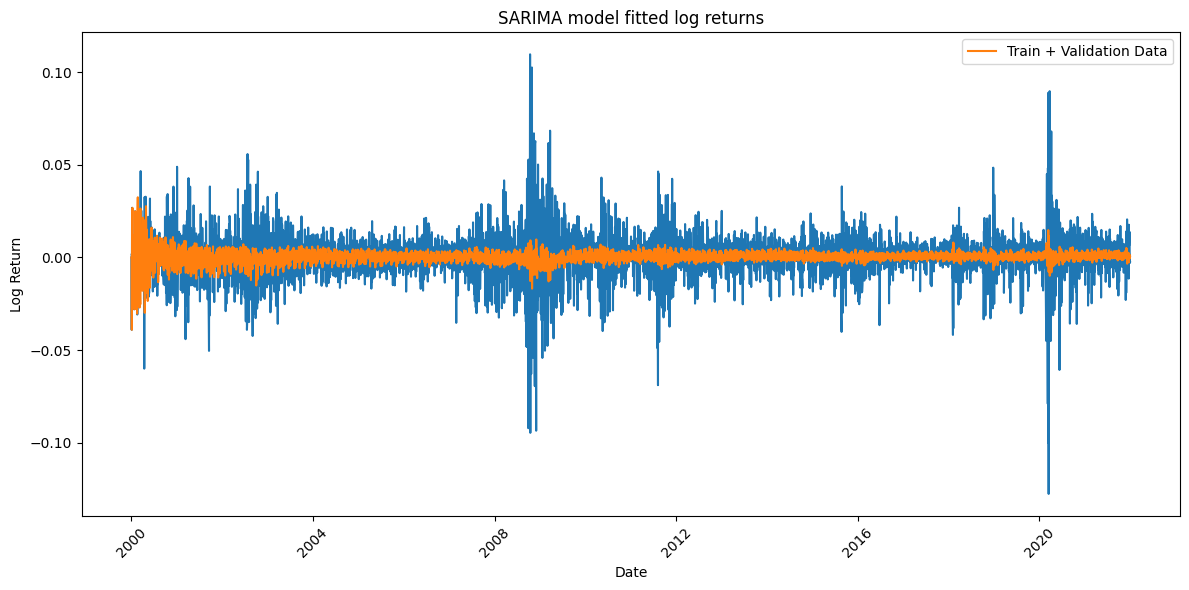

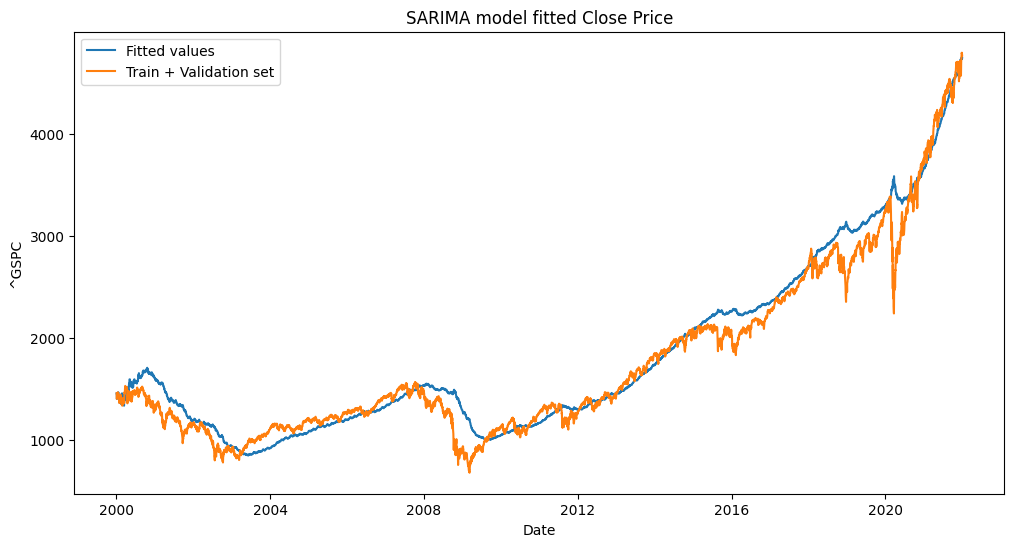

RMSE: 170.3523505987556
Mean Squared Error: 29019.92335452135
Mean Absolute Error: 122.1423828500708
R2 Score: 0.9605679581769574


In [10]:
#fitted values (predictions on the train + val set)
# model = ARIMA(train_val_data, order=(5, 1, 1), trend = 'n', seasonal_order=(1, 1, 1, 30)).fit(method='innovations_mle', low_memory=True, cov_type='none')


plt.figure(figsize=(12, 6))
sns.lineplot(x=train_val_data.index, y=train_val_data)
sns.lineplot(x=train_val_data.index, y=model.fittedvalues, label="Train + Validation Data")
plt.title('SARIMA model fitted log returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()
plt.show()


#fitted close price
initial_price = sp500_data['Close']['^GSPC'].iloc[0]
fitted_close_price = initial_price * np.exp(model.fittedvalues.cumsum())

plt.figure(figsize=(12, 6))
sns.lineplot(data=fitted_close_price, label="Fitted values")
sns.lineplot(x=sp500_data[:len(train_val_data)].index, y=sp500_data['Close'][:len(train_val_data)].squeeze(), label="Train + Validation set")
plt.title('SARIMA model fitted Close Price')
plt.xlabel('Date')
plt.show()


#compute metrics
mse = mean_squared_error(sp500_data['Close']['^GSPC'][:len(train_val_data)], fitted_close_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(sp500_data['Close']['^GSPC'][:len(train_val_data)], fitted_close_price)
r2 = r2_score(sp500_data['Close']['^GSPC'][:len(train_val_data)], fitted_close_price)

print(f'RMSE: {rmse}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')


#save fitted values
SARIMA_fitted_values = pd.Series(fitted_close_price, index = sp500_data.index[:len(train_val_data)])
path = '/content/gdrive/MyDrive/università/Machine_learning/Project_code/ARIMA/SARIMA_fitted_values.csv'
SARIMA_fitted_values.to_csv(path, index=True)

##Residuals

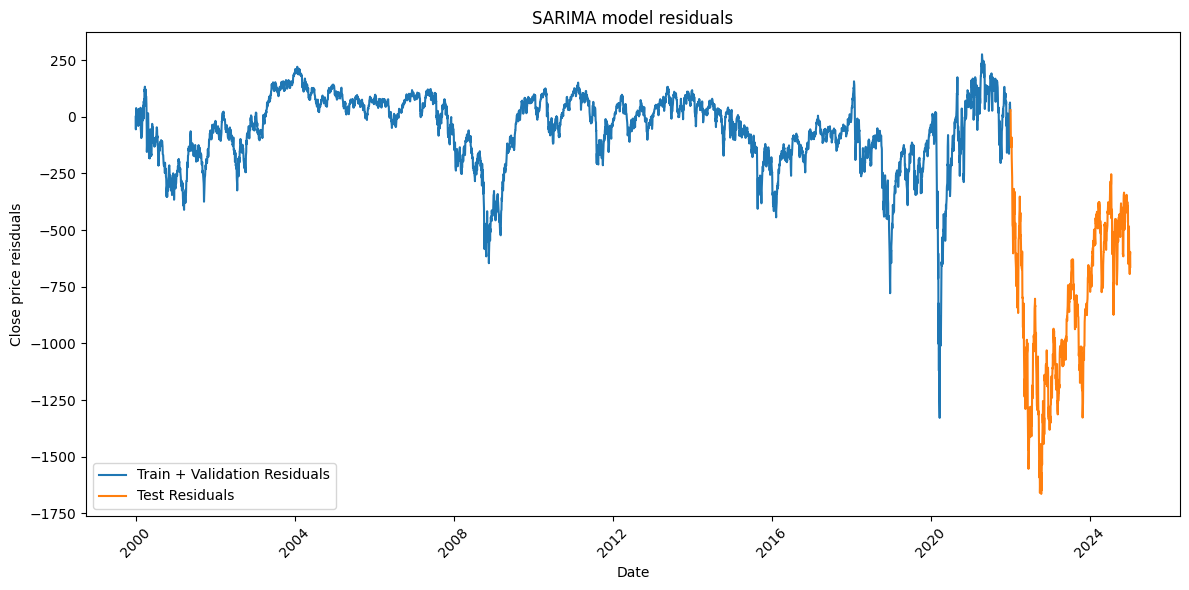

In [11]:
train_val_residuals = sp500_data['Close'][:len(train_val_data)].iloc[:,0] - fitted_close_price
test_residuals = sp500_data['Close'][len(train_val_data):].iloc[:,0] - predicted_close_price[len(train_val_data):]


#visualize
plt.figure(figsize=(12, 6))
sns.lineplot(data = train_val_residuals, label="Train + Validation Residuals")
sns.lineplot(data = test_residuals, label="Test Residuals")
plt.title('SARIMA model residuals')
plt.xlabel('Date')
plt.ylabel('Close price reisduals')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout() # Automatically adjusts the layout
plt.legend()


#save residuals
SARIMA_train_val_residuals = pd.Series(train_val_residuals, index = sp500_data.index[:len(train_val_data)])
SARIMA_test_residuals = pd.Series(test_residuals, index = sp500_data.index[len(train_val_data):])

path = '/content/gdrive/MyDrive/università/Machine_learning/Project_code/ARIMA/SARIMA_train_val_residuals.csv'
SARIMA_train_val_residuals.to_csv(path, index=True)

path = '/content/gdrive/MyDrive/università/Machine_learning/Project_code/ARIMA/SARIMA_test_residuals.csv'
SARIMA_test_residuals.to_csv(path, index=True)